Skript för att skapa listor från csv

In [ ]:
#@title
import pandas as pd
from matplotlib import pyplot as pl
path = "/content/GA data - Blad1 (1).csv"

eti = []
p = [] #perceptronvärden

with open(path, "r") as f:
  for line in f:
    xy = line.split(",")
    #eti.append(xy[16].replace("\n",""))
    if xy[12] == "1\n" or xy[13] == "0\n":
      eti.append(xy[13].replace("\n",""))
      #print(xy[12], xy[13])

etitemp = []
for i in eti:
  etitemp.append(int(i))
eti = etitemp

with open(path, "r") as f:
  for line in f:
    xy = line.split(",")
    if xy[15] != "":
      p.append(xy[15].replace("\n", "").replace(" ", ""))

ptemp2 = []
ptemp3 = []

for i in p:
  for g in range(5):
    ptemp3.append(int(i[g]))
  ptemp2.append(ptemp3)
  ptemp3 = []

p = ptemp2

#ptemp = []
#for i in p:
#  ptemp.append(int(i))
#p = ptemp

print(p)
print(eti)

FileNotFoundError: ignored

Själva ANN skiten

In [ ]:
#@title
perceptronlista = [[0, 1, 1, 1, 1], [0, 1, 1, 1, 0], [1, 1, 0, 1, 1], [0, 0, 1, 0, 1], [1, 0, 0, 0, 0], [1, 1, 0, 1, 1], [0, 0, 1, 1, 0], [1, 1, 1, 1, 1], [1, 0, 1, 1, 0], [1, 1, 1, 0, 1], [1, 1, 0, 0, 0], [0, 1, 1, 0, 1], [1, 0, 0, 1, 0], [0, 0, 1, 0, 0], [0, 1, 1, 1, 1], [0, 1, 1, 1, 0], [1, 0, 1, 1, 0], [0, 0, 0, 1, 1], [1, 1, 0, 1, 1], [1, 1, 1, 1, 1], [0, 0, 0, 1, 0], [1, 1, 1, 1, 0], [1, 0, 1, 0, 1], [0, 1, 1, 1, 0], [0, 0, 0, 0, 1], [0, 1, 1, 1, 1], [1, 0, 1, 1, 0], [0, 1, 0, 0, 0], [0, 0, 0, 1, 0], [0, 1, 1, 1, 1], [1, 0, 1, 1, 0], [1, 0, 1, 1, 1], [1, 1, 1, 0, 0], [0, 1, 1, 1, 0], [1, 0, 1, 1, 0], [0, 1, 0, 0, 1], [0, 0, 1, 1, 0], [0, 1, 1, 1, 1], [1, 0, 0, 0, 0], [0, 1, 0, 1, 1], [1, 1, 1, 1, 0], [0, 0, 0, 1, 1], [1, 1, 1, 1, 1], [0, 0, 1, 1, 0], [1, 0, 1, 0, 1], [1, 1, 1, 1, 0], [1, 0, 0, 1, 1], [1, 1, 1, 1, 0], [0, 0, 0, 0, 1], [0, 1, 1, 1, 0], [1, 0, 0, 0, 0], [0, 0, 0, 1, 1], [1, 0, 1, 1, 0], [1, 0, 0, 1, 0], [0, 1, 1, 1, 0], [1, 0, 1, 0, 1], [0, 0, 1, 1, 0], [0, 0, 1, 1, 1], [1, 1, 0, 1, 1], [1, 0, 1, 1, 1], [1, 0, 0, 0, 1], [0, 0, 1, 1, 1], [1, 0, 1, 1, 1], [1, 1, 0, 1, 0], [0, 1, 1, 1, 0], [1, 0, 1, 0, 0], [0, 0, 0, 0, 1], [0, 1, 0, 1, 0], [1, 0, 1, 0, 0], [0, 0, 1, 1, 1], [1, 0, 1, 1, 1], [0, 1, 1, 1, 1], [0, 1, 0, 0, 0], [1, 1, 0, 1, 0], [0, 1, 1, 1, 0], [1, 1, 0, 1, 0], [0, 0, 1, 1, 1], [1, 0, 1, 0, 0], [0, 1, 1, 1, 0], [1, 1, 0, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 0], [1, 1, 0, 1, 1], [0, 1, 0, 1, 0], [0, 1, 1, 1, 1], [1, 0, 0, 0, 0], [0, 0, 0, 0, 1], [1, 0, 1, 1, 1], [1, 1, 1, 1, 0]]
etikettlista = [0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1]

import numpy as np
def sigma(x):
    return 1 / (1 + np.exp(-x))

X = np.array(perceptronlista)
Y = np.array(etikettlista)

w_0 = 1
w_1 = 1
w_2 = 1
w_3 = 1
w_4 = 1
b = 0
alpha = 0.1
epochs = 1000
e = 0
while e < epochs:
    dw_0 = 0
    dw_1 = 0
    dw_2 = 0
    dw_3 = 0
    dw_4 = 0
    db = 0
    n = 0
    while n < len(perceptronlista):
        x = X[n]
        x_0 = x[0]
        x_1 = x[1]
        x_2 = x[2]
        x_3 = x[3]
        x_4 = x[4]
        y = Y[n]
        y_hat = sigma(w_4 * x_4 + w_3 * x_3 + w_2 * x_2 + w_0 * x_0 + w_1 * x_1 + b)
        dw_0 += 2 * (y_hat - y) * y_hat * (1 - y_hat) * x_0 / len(perceptronlista)
        dw_1 += 2 * (y_hat - y) * y_hat * (1 - y_hat) * x_1 / len(perceptronlista)
        dw_2 += 2 * (y_hat - y) * y_hat * (1 - y_hat) * x_2 / len(perceptronlista)
        dw_3 += 2 * (y_hat - y) * y_hat * (1 - y_hat) * x_3 / len(perceptronlista)
        dw_4 += 2 * (y_hat - y) * y_hat * (1 - y_hat) * x_4 / len(perceptronlista)
        db += 2 * (y_hat - y) * y_hat * (1 - y_hat) / len(perceptronlista)
        n += 1
    w_0 -= alpha * dw_0
    w_1 -= alpha * dw_1
    w_2 -= alpha * dw_2
    w_3 -= alpha * dw_3
    w_4 -= alpha * dw_4
    b -= alpha * db
    e += 1

temp1 = 0

n = 0
while n < len(perceptronlista):
    x = X[n]
    x_0 = x[0]
    x_1 = x[1]
    x_2 = x[2]
    x_3 = x[3]
    x_4 = x[4]
    y = Y[n]
    y_hat = sigma(w_4 * x_4 + w_3 * x_3 + w_2 * x_2 + w_0 * x_0 + w_1 * x_1 + b)
    #print(x, y, y_hat, sep="\t")
    n += 1

    temp1 += (y_hat - y) ** 2

print()
print("w_0 =", w_0)
print("w_1 =", w_1)
print("w_2 =", w_2)
print("w_3 =", w_3)
print("w_4 =", w_4)
print("b =", b)

print(temp1/len(perceptronlista))







w_0 = -0.8583932594109339
w_1 = 0.22110080691113884
w_2 = 0.8801023393751158
w_3 = 1.1234559411486245
w_4 = 0.8574085886687435
b = -1.22407901055518
0.19681172574127995


0.1944975162476712
0.15293436475272246
0.15293436475272246

w_0 = -1.1500436254630682
w_1 = 0.23972384980233175
w_2 = 1.2396464763156134
w_3 = 1.6345711621759706
w_4 = 1.2406670594067635
b = -1.830329830566622


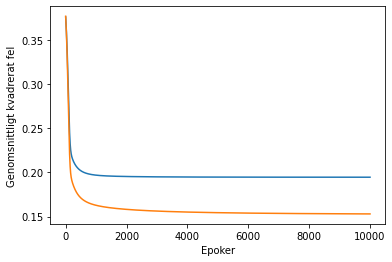

In [ ]:
#@title
#träningsdata
perceptronlista = [[0, 1, 1, 1, 1], [0, 1, 1, 1, 0], [1, 1, 0, 1, 1], [0, 0, 1, 0, 1], [1, 0, 0, 0, 0], [1, 1, 0, 1, 1], [0, 0, 1, 1, 0], [1, 1, 1, 1, 1], [1, 0, 1, 1, 0], [1, 1, 1, 0, 1], [1, 1, 0, 0, 0], [0, 1, 1, 0, 1], [1, 0, 0, 1, 0], [0, 0, 1, 0, 0], [0, 1, 1, 1, 1], [0, 1, 1, 1, 0], [1, 0, 1, 1, 0], [0, 0, 0, 1, 1], [1, 1, 0, 1, 1], [1, 1, 1, 1, 1], [0, 0, 0, 1, 0], [1, 1, 1, 1, 0], [1, 0, 1, 0, 1], [0, 1, 1, 1, 0], [0, 0, 0, 0, 1], [0, 1, 1, 1, 1], [1, 0, 1, 1, 0], [0, 1, 0, 0, 0], [0, 0, 0, 1, 0], [0, 1, 1, 1, 1], [1, 0, 1, 1, 0], [1, 0, 1, 1, 1], [1, 1, 1, 0, 0], [0, 1, 1, 1, 0], [1, 0, 1, 1, 0], [0, 1, 0, 0, 1], [0, 0, 1, 1, 0], [0, 1, 1, 1, 1], [1, 0, 0, 0, 0], [0, 1, 0, 1, 1], [1, 1, 1, 1, 0], [0, 0, 0, 1, 1], [1, 1, 1, 1, 1], [0, 0, 1, 1, 0], [1, 0, 1, 0, 1], [1, 1, 1, 1, 0], [1, 0, 0, 1, 1], [1, 1, 1, 1, 0], [0, 0, 0, 0, 1], [0, 1, 1, 1, 0], [1, 0, 0, 0, 0], [0, 0, 0, 1, 1], [1, 0, 1, 1, 0], [1, 0, 0, 1, 0], [0, 1, 1, 1, 0], [1, 0, 1, 0, 1], [0, 0, 1, 1, 0], [0, 0, 1, 1, 1], [1, 1, 0, 1, 1], [1, 0, 1, 1, 1], [1, 0, 0, 0, 1], [0, 0, 1, 1, 1], [1, 0, 1, 1, 1], [1, 1, 0, 1, 0], [0, 1, 1, 1, 0], [1, 0, 1, 0, 0], [0, 0, 0, 0, 1], [0, 1, 0, 1, 0], [1, 0, 1, 0, 0], [0, 0, 1, 1, 1], [1, 0, 1, 1, 1], [0, 1, 1, 1, 1], [0, 1, 0, 0, 0], [1, 1, 0, 1, 0], [0, 1, 1, 1, 0], [1, 1, 0, 1, 0], [0, 0, 1, 1, 1], [1, 0, 1, 0, 0], [0, 1, 1, 1, 0], [1, 1, 0, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 0], [1, 1, 0, 1, 1], [0, 1, 0, 1, 0], [0, 1, 1, 1, 1], [1, 0, 0, 0, 0], [0, 0, 0, 0, 1], [1, 0, 1, 1, 1], [1, 1, 1, 1, 0]]
etikettlista = [0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1]

#utvärderingsdata
perceptronlista2 = [[1, 0, 1, 1, 1], [1, 0, 0, 0, 0], [0, 0, 1, 1, 1], [1, 1, 1, 1, 0], [1, 1, 0, 1, 0], [0, 1, 0, 1, 1], [1, 1, 1, 1, 1], [1, 1, 0, 0, 0], [0, 0, 1, 1, 0], [1, 1, 1, 1, 1], [1, 0, 1, 0, 0], [0, 1, 0, 1, 1], [0, 0, 1, 1, 0], [1, 0, 1, 0, 1], [0, 1, 1, 1, 0], [0, 1, 1, 1, 1], [1, 0, 0, 1, 0], [0, 1, 1, 1, 1], [0, 1, 0, 1, 0], [1, 0, 1, 1, 1], [1, 0, 0, 0, 1], [0, 1, 1, 0, 0], [0, 1, 1, 1, 0], [1, 1, 1, 1, 0]]
etikettlista2 = [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1]

import matplotlib.pyplot as plt
import numpy as np
def sigma(x):
    return 1 / (1 + np.exp(-x))

X = np.array(perceptronlista)
Y = np.array(etikettlista)
Xn = np.array(perceptronlista2)
Yn = np.array(etikettlista2)


w_0 = 1
w_1 = 1
w_2 = 1
w_3 = 1
w_4 = 1
b = 0
alpha = 0.1
epochs = 10000
e = 0
genfel = []
genfelu = []

while e < epochs:
    dw_0 = 0
    dw_1 = 0
    dw_2 = 0
    dw_3 = 0
    dw_4 = 0
    db = 0
    n = 0
    while n < len(perceptronlista):
        x = X[n]
        x_0 = x[0]
        x_1 = x[1]
        x_2 = x[2]
        x_3 = x[3]
        x_4 = x[4]
        y = Y[n]
        y_hat = sigma(w_4 * x_4 + w_3 * x_3 + w_2 * x_2 + w_0 * x_0 + w_1 * x_1 + b)
        dw_0 += 2 * (y_hat - y) * y_hat * (1 - y_hat) * x_0 / len(perceptronlista)
        dw_1 += 2 * (y_hat - y) * y_hat * (1 - y_hat) * x_1 / len(perceptronlista)
        dw_2 += 2 * (y_hat - y) * y_hat * (1 - y_hat) * x_2 / len(perceptronlista)
        dw_3 += 2 * (y_hat - y) * y_hat * (1 - y_hat) * x_3 / len(perceptronlista)
        dw_4 += 2 * (y_hat - y) * y_hat * (1 - y_hat) * x_4 / len(perceptronlista)
        db += 2 * (y_hat - y) * y_hat * (1 - y_hat) / len(perceptronlista)
        n += 1
    w_0 -= alpha * dw_0
    w_1 -= alpha * dw_1
    w_2 -= alpha * dw_2
    w_3 -= alpha * dw_3
    w_4 -= alpha * dw_4
    b -= alpha * db
    n = 0
    temp1 = 0
      
    nu = 0
    temp1u = 0
    y_hatn = 0
    yn = 0

    while n < len(perceptronlista):
      x = X[n]
      x_0 = x[0]
      x_1 = x[1]
      x_2 = x[2]
      x_3 = x[3]
      x_4 = x[4]
      y = Y[n]
      y_hat = sigma(w_4 * x_4 + w_3 * x_3 + w_2 * x_2 + w_0 * x_0 + w_1 * x_1 + b)
      #print(x, y, y_hat, sep="\t")
      temp1 += (y_hat - y) ** 2
      n += 1
    #print(temp1/len(perceptronlista)) #genomsnittliga kvadrerade felet
    genfel.append(temp1/len(perceptronlista))

   
     #UTVÄRDERINGSGREJ
    while nu < (len(perceptronlista2)):
      
      
      
      xn = Xn[nu]
      ux_0 = xn[0]
      ux_1 = xn[1]
      ux_2 = xn[2]
      ux_3 = xn[3]
      ux_4 = xn[4]
      yn = Yn[nu]
      y_hatn = sigma(w_4 * ux_4 + w_3 * ux_3 + w_2 * ux_2 + w_1 * ux_1 + w_0 * ux_0 + b)
      temp1u += (y_hatn - yn) ** 2
      #print(y_hatn, yn)
      nu += 1

    genfelu.append(temp1u/len(etikettlista2))

    #print(genfelu)

#UTVÄRDERINGSGREJ SLUT



    e += 1
print(temp1/len(perceptronlista))
print(temp1u/len(perceptronlista2))
print(genfelu[-1])

print()
print("w_0 =", w_0)
print("w_1 =", w_1)
print("w_2 =", w_2)
print("w_3 =", w_3)
print("w_4 =", w_4)
print("b =", b)
#print(genfel)

plt.plot(genfel)
plt.plot(genfelu)
plt.ylabel("Genomsnittligt kvadrerat fel")
plt.xlabel("Epoker")
plt.show()





länkar man ksk behöver

pyplot: https://matplotlib.org/stable/tutorials/introductory/pyplot.html


In [ ]:
#@title
Uperceptroner = [[1, 0, 1, 1, 1], [1, 0, 0, 0, 0], [0, 0, 1, 1, 1], [1, 1, 1, 1, 0], [1, 1, 0, 1, 0], [0, 1, 0, 1, 1], [1, 1, 1, 1, 1], [1, 1, 0, 0, 0], [0, 0, 1, 1, 0], [1, 1, 1, 1, 1], [1, 0, 1, 0, 0], [0, 1, 0, 1, 1], [0, 0, 1, 1, 0], [1, 0, 1, 0, 1], [0, 1, 1, 1, 0], [0, 1, 1, 1, 1], [1, 0, 0, 1, 0], [0, 1, 1, 1, 1], [0, 1, 0, 1, 0], [1, 0, 1, 1, 1], [1, 0, 0, 0, 1], [0, 1, 1, 0, 0], [0, 1, 1, 1, 0], [1, 1, 1, 1, 0]]
Uetiketter = [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1]
def sigma(x):
    return 1 / (1 + np.exp(-x))

uw_0 = -1.1199366652137117
uw_1 = 0.20447873244092243
uw_2 = 1.1422341438498427
uw_3 = 1.5230958140947282
uw_4 = 1.123308409290359
ub = -1.6357563209063564
uX = np.array(Uperceptroner)
uY = np.array(Uetiketter)
un = 0
utemp1 = 0
while un < (len(Uperceptroner)):
  ux = uX[un]
  ux_0 = ux[0]
  ux_1 = ux[1]
  ux_2 = ux[2]
  ux_3 = ux[3]
  ux_4 = ux[4]
  uy = uY[un]
  uy_hat = sigma(uw_4 * ux_4 + uw_3 * ux_3 + uw_2 * ux_2 + uw_0 * ux_0 + uw_1 * ux_1 + ub)
 # print(uy_hat, uy)
  utemp1 += (uy_hat - uy) ** 2
  un += 1
print(utemp1/len(Uperceptroner))
nu2 = 0
vinst = 0
förlust = 0
g = 0
p = 0 
s = 0
while nu2 < (len(Uetiketter)):
  ux = uX[nu2]
  ux_0 = ux[0]
  ux_1 = ux[1]
  ux_2 = ux[2]
  ux_3 = ux[3]
  ux_4 = ux[4]
  uy = uY[nu2]
  uy_hat = sigma(uw_4 * ux_4 + uw_3 * ux_3 + uw_2 * ux_2 + uw_0 * ux_0 + uw_1 * ux_1 + ub)
  utemp1 += (uy_hat - uy) ** 2    
      
  nu2 += 1
  if np.round(uy_hat) == uy:
    p += 1


  if uy == 1:
    vinst+=1
  if np.round(uy_hat) == uy and uy == 1:
    s +=1
  if uy == 0:
    förlust+=1
  if np.round(uy_hat) == uy and uy == 0:
    g +=1
  
print("antal vinster ",vinst)
print("antal procent rätta gissningar på vinster", s/vinst)
print("antal förluster ", förlust)
print("antal procent rätta gissningar på förlust/lika",g/förlust)
print("hur många procent av våra prediktioner som är rätt ",p/len(Uetiketter))

0.15464703213085093
antal vinster  13
antal procent rätta gissningar på vinster 1.0
antal förluster  11
antal procent rätta gissningar på förlust/lika 0.7272727272727273
hur många procent av våra prediktioner som är rätt  0.875


In [ ]:
#@title
#träningsdata
perceptronlista = [[0, 1, 1, 1, 1], [0, 1, 1, 1, 0], [1, 1, 0, 1, 1], [0, 0, 1, 0, 1], [1, 0, 0, 0, 0], [1, 1, 0, 1, 1], [0, 0, 1, 1, 0], [1, 1, 1, 1, 1], [1, 0, 1, 1, 0], [1, 1, 1, 0, 1], [1, 1, 0, 0, 0], [0, 1, 1, 0, 1], [1, 0, 0, 1, 0], [0, 0, 1, 0, 0], [0, 1, 1, 1, 1], [0, 1, 1, 1, 0], [1, 0, 1, 1, 0], [0, 0, 0, 1, 1], [1, 1, 0, 1, 1], [1, 1, 1, 1, 1], [0, 0, 0, 1, 0], [1, 1, 1, 1, 0], [1, 0, 1, 0, 1], [0, 1, 1, 1, 0], [0, 0, 0, 0, 1], [0, 1, 1, 1, 1], [1, 0, 1, 1, 0], [0, 1, 0, 0, 0], [0, 0, 0, 1, 0], [0, 1, 1, 1, 1], [1, 0, 1, 1, 0], [1, 0, 1, 1, 1], [1, 1, 1, 0, 0], [0, 1, 1, 1, 0], [1, 0, 1, 1, 0], [0, 1, 0, 0, 1], [0, 0, 1, 1, 0], [0, 1, 1, 1, 1], [1, 0, 0, 0, 0], [0, 1, 0, 1, 1], [1, 1, 1, 1, 0], [0, 0, 0, 1, 1], [1, 1, 1, 1, 1], [0, 0, 1, 1, 0], [1, 0, 1, 0, 1], [1, 1, 1, 1, 0], [1, 0, 0, 1, 1], [1, 1, 1, 1, 0], [0, 0, 0, 0, 1], [0, 1, 1, 1, 0], [1, 0, 0, 0, 0], [0, 0, 0, 1, 1], [1, 0, 1, 1, 0], [1, 0, 0, 1, 0], [0, 1, 1, 1, 0], [1, 0, 1, 0, 1], [0, 0, 1, 1, 0], [0, 0, 1, 1, 1], [1, 1, 0, 1, 1], [1, 0, 1, 1, 1], [1, 0, 0, 0, 1], [0, 0, 1, 1, 1], [1, 0, 1, 1, 1], [1, 1, 0, 1, 0], [0, 1, 1, 1, 0], [1, 0, 1, 0, 0], [0, 0, 0, 0, 1], [0, 1, 0, 1, 0], [1, 0, 1, 0, 0], [0, 0, 1, 1, 1], [1, 0, 1, 1, 1], [0, 1, 1, 1, 1], [0, 1, 0, 0, 0], [1, 1, 0, 1, 0], [0, 1, 1, 1, 0], [1, 1, 0, 1, 0], [0, 0, 1, 1, 1], [1, 0, 1, 0, 0], [0, 1, 1, 1, 0], [1, 1, 0, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 0], [1, 1, 0, 1, 1], [0, 1, 0, 1, 0], [0, 1, 1, 1, 1], [1, 0, 0, 0, 0], [0, 0, 0, 0, 1], [1, 0, 1, 1, 1], [1, 1, 1, 1, 0]]
etikettlista = [0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1]

#utvärderingsdata
perceptronerlista2 = [[1, 0, 1, 1, 1], [1, 0, 0, 0, 0], [0, 0, 1, 1, 1], [1, 1, 1, 1, 0], [1, 1, 0, 1, 0], [0, 1, 0, 1, 1], [1, 1, 1, 1, 1], [1, 1, 0, 0, 0], [0, 0, 1, 1, 0], [1, 1, 1, 1, 1], [1, 0, 1, 0, 0], [0, 1, 0, 1, 1], [0, 0, 1, 1, 0], [1, 0, 1, 0, 1], [0, 1, 1, 1, 0], [0, 1, 1, 1, 1], [1, 0, 0, 1, 0], [0, 1, 1, 1, 1], [0, 1, 0, 1, 0], [1, 0, 1, 1, 1], [1, 0, 0, 0, 1], [0, 1, 1, 0, 0], [0, 1, 1, 1, 0], [1, 1, 1, 1, 0]]
etikettlista2 = [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1]

import matplotlib.pyplot as plt
import numpy as np
def sigma(x):
    return 1 / (1 + np.exp(-x))

X = np.array(perceptronlista)
Y = np.array(etikettlista)

w_0 = 1
w_1 = 1
b = 0
alpha = 0.1
epochs = 100
e = 0
genfel = []

while e < epochs:
    dw_0 = 0
    dw_1 = 0
    db = 0
    n = 0
    while n < len(perceptronlista):
        x = X[n]
        x_0 = x[3]
        x_1 = x[4]
        y = Y[n]
        y_hat = sigma(w_0 * x_0 + w_1 * x_1 + b)
        dw_0 += 2 * (y_hat - y) * y_hat * (1 - y_hat) * x_0 / 4
        dw_1 += 2 * (y_hat - y) * y_hat * (1 - y_hat) * x_1 / 4
        db += 2 * (y_hat - y) * y_hat * (1 - y_hat) / 4
        n += 1
    w_0 -= alpha * dw_0
    w_1 -= alpha * dw_1
    b -= alpha * db
    n = 0
    temp1 = 0
    while n < len(perceptronlista):
      x = X[n]
      x_0 = x[3]
      x_1 = x[4]
      y = Y[n]
      y_hat = sigma(w_0 * x_0 + w_1 * x_1 + b)
      #print(x, y, y_hat, sep="\t")
      temp1 += (y_hat - y) ** 2
      n += 1
    #print(temp1/len(perceptronlista)) #genomsnittliga kvadrerade felet
    genfel.append(temp1/len(perceptronlista))
    e += 1
print(temp1/len(perceptronlista))

temp1 = 0



print()
print("w_0 =", w_0)
print("w_1 =", w_1)
print("b =", b)
#print(genfel)
plt.plot(genfel)
plt.ylabel("Genomsnittligt kvadrerat fel")
plt.xlabel("Epok")
plt.show()





In [ ]:
#@title
Uperceptroner = [[1, 0, 1, 1, 1], [1, 0, 0, 0, 0], [0, 0, 1, 1, 1], [1, 1, 1, 1, 0], [1, 1, 0, 1, 0], [0, 1, 0, 1, 1], [1, 1, 1, 1, 1], [1, 1, 0, 0, 0], [0, 0, 1, 1, 0], [1, 1, 1, 1, 1], [1, 0, 1, 0, 0], [0, 1, 0, 1, 1], [0, 0, 1, 1, 0], [1, 0, 1, 0, 1], [0, 1, 1, 1, 0], [0, 1, 1, 1, 1], [1, 0, 0, 1, 0], [0, 1, 1, 1, 1], [0, 1, 0, 1, 0], [1, 0, 1, 1, 1], [1, 0, 0, 0, 1], [0, 1, 1, 0, 0], [0, 1, 1, 1, 0], [1, 1, 1, 1, 0]]
Uetiketter = [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1]
def sigma(x):
    return 1 / (1 + np.exp(-x))

w_3 = 1.388485836434967
w_4 = 0.7485508019538847
b = -1.1959699077708796
X = np.array(Uperceptroner)
Y = np.array(Uetiketter)
n = 0
temp1 = 0
while n < (len(Uperceptroner)):
  x = X[n]
  x_3 = x[3]
  x_4 = x[4]
  y = Y[n]
  y_hat = sigma(w_4 * x_4 + w_3 * x_3 + b)
  temp1 += (y_hat - y) ** 2
  n += 1
print(temp1/len(Uperceptroner))

0.20707389628369938

w_0 = -0.9586252087046858
w_3 = 1.462033515788897
w_4 = 0.7357667527751262
b = -0.7517198679100481


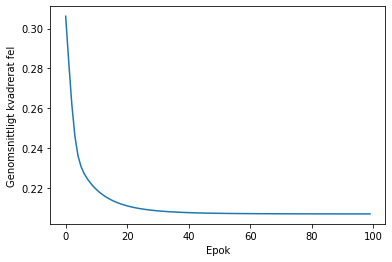

In [ ]:
#@title
#träningsdata
perceptronlista = [[0, 1, 1, 1, 1], [0, 1, 1, 1, 0], [1, 1, 0, 1, 1], [0, 0, 1, 0, 1], [1, 0, 0, 0, 0], [1, 1, 0, 1, 1], [0, 0, 1, 1, 0], [1, 1, 1, 1, 1], [1, 0, 1, 1, 0], [1, 1, 1, 0, 1], [1, 1, 0, 0, 0], [0, 1, 1, 0, 1], [1, 0, 0, 1, 0], [0, 0, 1, 0, 0], [0, 1, 1, 1, 1], [0, 1, 1, 1, 0], [1, 0, 1, 1, 0], [0, 0, 0, 1, 1], [1, 1, 0, 1, 1], [1, 1, 1, 1, 1], [0, 0, 0, 1, 0], [1, 1, 1, 1, 0], [1, 0, 1, 0, 1], [0, 1, 1, 1, 0], [0, 0, 0, 0, 1], [0, 1, 1, 1, 1], [1, 0, 1, 1, 0], [0, 1, 0, 0, 0], [0, 0, 0, 1, 0], [0, 1, 1, 1, 1], [1, 0, 1, 1, 0], [1, 0, 1, 1, 1], [1, 1, 1, 0, 0], [0, 1, 1, 1, 0], [1, 0, 1, 1, 0], [0, 1, 0, 0, 1], [0, 0, 1, 1, 0], [0, 1, 1, 1, 1], [1, 0, 0, 0, 0], [0, 1, 0, 1, 1], [1, 1, 1, 1, 0], [0, 0, 0, 1, 1], [1, 1, 1, 1, 1], [0, 0, 1, 1, 0], [1, 0, 1, 0, 1], [1, 1, 1, 1, 0], [1, 0, 0, 1, 1], [1, 1, 1, 1, 0], [0, 0, 0, 0, 1], [0, 1, 1, 1, 0], [1, 0, 0, 0, 0], [0, 0, 0, 1, 1], [1, 0, 1, 1, 0], [1, 0, 0, 1, 0], [0, 1, 1, 1, 0], [1, 0, 1, 0, 1], [0, 0, 1, 1, 0], [0, 0, 1, 1, 1], [1, 1, 0, 1, 1], [1, 0, 1, 1, 1], [1, 0, 0, 0, 1], [0, 0, 1, 1, 1], [1, 0, 1, 1, 1], [1, 1, 0, 1, 0], [0, 1, 1, 1, 0], [1, 0, 1, 0, 0], [0, 0, 0, 0, 1], [0, 1, 0, 1, 0], [1, 0, 1, 0, 0], [0, 0, 1, 1, 1], [1, 0, 1, 1, 1], [0, 1, 1, 1, 1], [0, 1, 0, 0, 0], [1, 1, 0, 1, 0], [0, 1, 1, 1, 0], [1, 1, 0, 1, 0], [0, 0, 1, 1, 1], [1, 0, 1, 0, 0], [0, 1, 1, 1, 0], [1, 1, 0, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 0], [1, 1, 0, 1, 1], [0, 1, 0, 1, 0], [0, 1, 1, 1, 1], [1, 0, 0, 0, 0], [0, 0, 0, 0, 1], [1, 0, 1, 1, 1], [1, 1, 1, 1, 0]]
etikettlista = [0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1]

#utvärderingsdata
perceptronerlista2 = [[1, 0, 1, 1, 1], [1, 0, 0, 0, 0], [0, 0, 1, 1, 1], [1, 1, 1, 1, 0], [1, 1, 0, 1, 0], [0, 1, 0, 1, 1], [1, 1, 1, 1, 1], [1, 1, 0, 0, 0], [0, 0, 1, 1, 0], [1, 1, 1, 1, 1], [1, 0, 1, 0, 0], [0, 1, 0, 1, 1], [0, 0, 1, 1, 0], [1, 0, 1, 0, 1], [0, 1, 1, 1, 0], [0, 1, 1, 1, 1], [1, 0, 0, 1, 0], [0, 1, 1, 1, 1], [0, 1, 0, 1, 0], [1, 0, 1, 1, 1], [1, 0, 0, 0, 1], [0, 1, 1, 0, 0], [0, 1, 1, 1, 0], [1, 1, 1, 1, 0]]
etikettlista2 = [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1]

import matplotlib.pyplot as plt
import numpy as np
def sigma(x):
    return 1 / (1 + np.exp(-x))

X = np.array(perceptronlista)
Y = np.array(etikettlista)

w_0 = 1
w_3 = 1
w_4 = 1
b = 0
alpha = 0.1
epochs = 100
e = 0
genfel = []

while e < epochs:
    dw_0 = 0
    dw_3 = 0
    dw_4 = 0
    db = 0
    n = 0
    while n < len(perceptronlista):
        x = X[n]
        x_0 = x[0]
        x_3 = x[3]
        x_4 = x[4]
        y = Y[n]
        y_hat = sigma(w_4 * x_4 + w_3 * x_3 +  w_0 * x_0 + b)
        dw_0 += 2 * (y_hat - y) * y_hat * (1 - y_hat) * x_0 / 4
        dw_3 += 2 * (y_hat - y) * y_hat * (1 - y_hat) * x_3 / 4
        dw_4 += 2 * (y_hat - y) * y_hat * (1 - y_hat) * x_4 / 4
        db += 2 * (y_hat - y) * y_hat * (1 - y_hat) / 4
        n += 1
    w_0 -= alpha * dw_0
    w_3 -= alpha * dw_3
    w_4 -= alpha * dw_4
    b -= alpha * db
    n = 0
    temp1 = 0
    while n < len(perceptronlista):
      x = X[n]
      x_0 = x[0]
      x_3 = x[3]
      x_4 = x[4]
      y = Y[n]
      y_hat = sigma(w_4 * x_4 + w_3 * x_3 + w_0 * x_0 + b)
      #print(x, y, y_hat, sep="\t")
      temp1 += (y_hat - y) ** 2
      n += 1
    #print(temp1/len(perceptronlista)) #genomsnittliga kvadrerade felet
    genfel.append(temp1/len(perceptronlista))
    e += 1
print(temp1/len(perceptronlista))

temp1 = 0



print()
print("w_0 =", w_0)
print("w_3 =", w_3)
print("w_4 =", w_4)
print("b =", b)
#print(genfel)
plt.plot(genfel)
plt.ylabel("Genomsnittligt kvadrerat fel")
plt.xlabel("Epok")
plt.show()





# Kod som testar utvärderingsdatan med våra första vikter från träningsdatan

In [ ]:
#@title
Uperceptroner = [[1, 0, 1, 1, 1], [1, 0, 0, 0, 0], [0, 0, 1, 1, 1], [1, 1, 1, 1, 0], [1, 1, 0, 1, 0], [0, 1, 0, 1, 1], [1, 1, 1, 1, 1], [1, 1, 0, 0, 0], [0, 0, 1, 1, 0], [1, 1, 1, 1, 1], [1, 0, 1, 0, 0], [0, 1, 0, 1, 1], [0, 0, 1, 1, 0], [1, 0, 1, 0, 1], [0, 1, 1, 1, 0], [0, 1, 1, 1, 1], [1, 0, 0, 1, 0], [0, 1, 1, 1, 1], [0, 1, 0, 1, 0], [1, 0, 1, 1, 1], [1, 0, 0, 0, 1], [0, 1, 1, 0, 0], [0, 1, 1, 1, 0], [1, 1, 1, 1, 0]]
Uetiketter = [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1]
def sigma(x):
    return 1 / (1 + np.exp(-x))

w_0 = -0.9586252087046858
w_3 = 1.462033515788897
w_4 = 0.7357667527751262
b = -0.7517198679100481
X = np.array(Uperceptroner)
Y = np.array(Uetiketter)
n = 0
temp1 = 0
while n < (len(Uperceptroner)):
  x = X[n]
  x_0 = x[0]
  x_3 = x[3]
  x_4 = x[4]
  y = Y[n]
  y_hat = sigma(w_4 * x_4 + w_3 * x_3 + w_0 * x_0 + b)
  temp1 += (y_hat - y) ** 2
  n += 1
print(temp1/len(Uperceptroner))

0.17585908331963507


# Kod som ändrar längden på listorna så att utvärderingsdatan och träningsdatan blir lika långa


In [ ]:
#@title
perceptronlista = [[0, 1, 1, 1, 1], [0, 1, 1, 1, 0], [1, 1, 0, 1, 1], [0, 0, 1, 0, 1], [1, 0, 0, 0, 0], [1, 1, 0, 1, 1], [0, 0, 1, 1, 0], [1, 1, 1, 1, 1], [1, 0, 1, 1, 0], [1, 1, 1, 0, 1], [1, 1, 0, 0, 0], [0, 1, 1, 0, 1], [1, 0, 0, 1, 0], [0, 0, 1, 0, 0], [0, 1, 1, 1, 1], [0, 1, 1, 1, 0], [1, 0, 1, 1, 0], [0, 0, 0, 1, 1], [1, 1, 0, 1, 1], [1, 1, 1, 1, 1], [0, 0, 0, 1, 0], [1, 1, 1, 1, 0], [1, 0, 1, 0, 1], [0, 1, 1, 1, 0], [0, 0, 0, 0, 1], [0, 1, 1, 1, 1], [1, 0, 1, 1, 0], [0, 1, 0, 0, 0], [0, 0, 0, 1, 0], [0, 1, 1, 1, 1], [1, 0, 1, 1, 0], [1, 0, 1, 1, 1], [1, 1, 1, 0, 0], [0, 1, 1, 1, 0], [1, 0, 1, 1, 0], [0, 1, 0, 0, 1], [0, 0, 1, 1, 0], [0, 1, 1, 1, 1], [1, 0, 0, 0, 0], [0, 1, 0, 1, 1], [1, 1, 1, 1, 0], [0, 0, 0, 1, 1], [1, 1, 1, 1, 1], [0, 0, 1, 1, 0], [1, 0, 1, 0, 1], [1, 1, 1, 1, 0], [1, 0, 0, 1, 1], [1, 1, 1, 1, 0], [0, 0, 0, 0, 1], [0, 1, 1, 1, 0], [1, 0, 0, 0, 0], [0, 0, 0, 1, 1], [1, 0, 1, 1, 0], [1, 0, 0, 1, 0], [0, 1, 1, 1, 0], [1, 0, 1, 0, 1], [0, 0, 1, 1, 0], [0, 0, 1, 1, 1], [1, 1, 0, 1, 1], [1, 0, 1, 1, 1], [1, 0, 0, 0, 1], [0, 0, 1, 1, 1], [1, 0, 1, 1, 1], [1, 1, 0, 1, 0], [0, 1, 1, 1, 0], [1, 0, 1, 0, 0], [0, 0, 0, 0, 1], [0, 1, 0, 1, 0], [1, 0, 1, 0, 0], [0, 0, 1, 1, 1], [1, 0, 1, 1, 1], [0, 1, 1, 1, 1], [0, 1, 0, 0, 0], [1, 1, 0, 1, 0], [0, 1, 1, 1, 0], [1, 1, 0, 1, 0], [0, 0, 1, 1, 1], [1, 0, 1, 0, 0], [0, 1, 1, 1, 0], [1, 1, 0, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 0], [1, 1, 0, 1, 1], [0, 1, 0, 1, 0], [0, 1, 1, 1, 1], [1, 0, 0, 0, 0], [0, 0, 0, 0, 1], [1, 0, 1, 1, 1], [1, 1, 1, 1, 0]]
etikettlista = [0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1]
Uperceptronlista = [[1, 0, 1, 1, 1], [1, 0, 0, 0, 0], [0, 0, 1, 1, 1], [1, 1, 1, 1, 0], [1, 1, 0, 1, 0], [0, 1, 0, 1, 1], [1, 1, 1, 1, 1], [1, 1, 0, 0, 0], [0, 0, 1, 1, 0], [1, 1, 1, 1, 1], [1, 0, 1, 0, 0], [0, 1, 0, 1, 1], [0, 0, 1, 1, 0], [1, 0, 1, 0, 1], [0, 1, 1, 1, 0], [0, 1, 1, 1, 1], [1, 0, 0, 1, 0], [0, 1, 1, 1, 1], [0, 1, 0, 1, 0], [1, 0, 1, 1, 1], [1, 0, 0, 0, 1], [0, 1, 1, 0, 0], [0, 1, 1, 1, 0], [1, 1, 1, 1, 0]]
Uetikettlista = [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1]
print(len(perceptronlista),len(Uperceptronlista))
for i in range(32):
  Uperceptronlista.append(perceptronlista[-1])
  Uetikettlista.append(etikettlista[-1])
  perceptronlista.pop(-1)
  etikettlista.pop(-1)
print("träningsdata", (perceptronlista))
print("etiketter", etikettlista)
print("utvärderingsdata", Uperceptronlista)
print("utvärderingsetikett", Uetikettlista)


89 24
träningsdata [[0, 1, 1, 1, 1], [0, 1, 1, 1, 0], [1, 1, 0, 1, 1], [0, 0, 1, 0, 1], [1, 0, 0, 0, 0], [1, 1, 0, 1, 1], [0, 0, 1, 1, 0], [1, 1, 1, 1, 1], [1, 0, 1, 1, 0], [1, 1, 1, 0, 1], [1, 1, 0, 0, 0], [0, 1, 1, 0, 1], [1, 0, 0, 1, 0], [0, 0, 1, 0, 0], [0, 1, 1, 1, 1], [0, 1, 1, 1, 0], [1, 0, 1, 1, 0], [0, 0, 0, 1, 1], [1, 1, 0, 1, 1], [1, 1, 1, 1, 1], [0, 0, 0, 1, 0], [1, 1, 1, 1, 0], [1, 0, 1, 0, 1], [0, 1, 1, 1, 0], [0, 0, 0, 0, 1], [0, 1, 1, 1, 1], [1, 0, 1, 1, 0], [0, 1, 0, 0, 0], [0, 0, 0, 1, 0], [0, 1, 1, 1, 1], [1, 0, 1, 1, 0], [1, 0, 1, 1, 1], [1, 1, 1, 0, 0], [0, 1, 1, 1, 0], [1, 0, 1, 1, 0], [0, 1, 0, 0, 1], [0, 0, 1, 1, 0], [0, 1, 1, 1, 1], [1, 0, 0, 0, 0], [0, 1, 0, 1, 1], [1, 1, 1, 1, 0], [0, 0, 0, 1, 1], [1, 1, 1, 1, 1], [0, 0, 1, 1, 0], [1, 0, 1, 0, 1], [1, 1, 1, 1, 0], [1, 0, 0, 1, 1], [1, 1, 1, 1, 0], [0, 0, 0, 0, 1], [0, 1, 1, 1, 0], [1, 0, 0, 0, 0], [0, 0, 0, 1, 1], [1, 0, 1, 1, 0], [1, 0, 0, 1, 0], [0, 1, 1, 1, 0], [1, 0, 1, 0, 1], [0, 0, 1, 1, 0]]
etiketter [

# Den nya utvärderingsdatan och träningsdatan samt etiketter
träningsdata = [[0, 1, 1, 1, 1], [0, 1, 1, 1, 0], [1, 1, 0, 1, 1], [0, 0, 1, 0, 1], [1, 0, 0, 0, 0], [1, 1, 0, 1, 1], [0, 0, 1, 1, 0], [1, 1, 1, 1, 1], [1, 0, 1, 1, 0], [1, 1, 1, 0, 1], [1, 1, 0, 0, 0], [0, 1, 1, 0, 1], [1, 0, 0, 1, 0], [0, 0, 1, 0, 0], [0, 1, 1, 1, 1], [0, 1, 1, 1, 0], [1, 0, 1, 1, 0], [0, 0, 0, 1, 1], [1, 1, 0, 1, 1], [1, 1, 1, 1, 1], [0, 0, 0, 1, 0], [1, 1, 1, 1, 0], [1, 0, 1, 0, 1], [0, 1, 1, 1, 0], [0, 0, 0, 0, 1], [0, 1, 1, 1, 1], [1, 0, 1, 1, 0], [0, 1, 0, 0, 0], [0, 0, 0, 1, 0], [0, 1, 1, 1, 1], [1, 0, 1, 1, 0], [1, 0, 1, 1, 1], [1, 1, 1, 0, 0], [0, 1, 1, 1, 0], [1, 0, 1, 1, 0], [0, 1, 0, 0, 1], [0, 0, 1, 1, 0], [0, 1, 1, 1, 1], [1, 0, 0, 0, 0], [0, 1, 0, 1, 1], [1, 1, 1, 1, 0], [0, 0, 0, 1, 1], [1, 1, 1, 1, 1], [0, 0, 1, 1, 0], [1, 0, 1, 0, 1], [1, 1, 1, 1, 0], [1, 0, 0, 1, 1], [1, 1, 1, 1, 0], [0, 0, 0, 0, 1], [0, 1, 1, 1, 0], [1, 0, 0, 0, 0], [0, 0, 0, 1, 1], [1, 0, 1, 1, 0], [1, 0, 0, 1, 0], [0, 1, 1, 1, 0], [1, 0, 1, 0, 1], [0, 0, 1, 1, 0]]




etiketter [0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0]




utvärderingsdata = [[1, 0, 1, 1, 1], [1, 0, 0, 0, 0], [0, 0, 1, 1, 1], [1, 1, 1, 1, 0], [1, 1, 0, 1, 0], [0, 1, 0, 1, 1], [1, 1, 1, 1, 1], [1, 1, 0, 0, 0], [0, 0, 1, 1, 0], [1, 1, 1, 1, 1], [1, 0, 1, 0, 0], [0, 1, 0, 1, 1], [0, 0, 1, 1, 0], [1, 0, 1, 0, 1], [0, 1, 1, 1, 0], [0, 1, 1, 1, 1], [1, 0, 0, 1, 0], [0, 1, 1, 1, 1], [0, 1, 0, 1, 0], [1, 0, 1, 1, 1], [1, 0, 0, 0, 1], [0, 1, 1, 0, 0], [0, 1, 1, 1, 0], [1, 1, 1, 1, 0], [1, 1, 1, 1, 0], [1, 0, 1, 1, 1], [0, 0, 0, 0, 1], [1, 0, 0, 0, 0], [0, 1, 1, 1, 1], [0, 1, 0, 1, 0], [1, 1, 0, 1, 1], [1, 1, 1, 1, 0], [1, 1, 1, 1, 1], [1, 1, 0, 1, 1], [0, 1, 1, 1, 0], [1, 0, 1, 0, 0], [0, 0, 1, 1, 1], [1, 1, 0, 1, 0], [0, 1, 1, 1, 0], [1, 1, 0, 1, 0], [0, 1, 0, 0, 0], [0, 1, 1, 1, 1], [1, 0, 1, 1, 1], [0, 0, 1, 1, 1], [1, 0, 1, 0, 0], [0, 1, 0, 1, 0], [0, 0, 0, 0, 1], [1, 0, 1, 0, 0], [0, 1, 1, 1, 0], [1, 1, 0, 1, 0], [1, 0, 1, 1, 1], [0, 0, 1, 1, 1], [1, 0, 0, 0, 1], [1, 0, 1, 1, 1], [1, 1, 0, 1, 1], [0, 0, 1, 1, 1]]


utvärderingsetikett [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1]

0.21383321824421628

w_0 = -0.7985455697361312
w_1 = -0.0946759174874671
w_2 = 0.7676172565770943
w_3 = 1.1603425676423043
w_4 = 0.8039423267778788
b = -1.2045422528227725


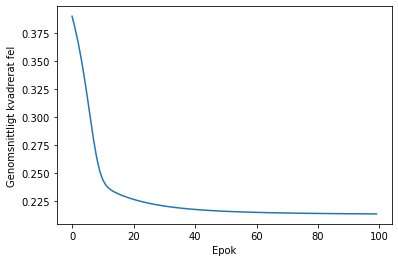

In [ ]:
#@title
träningsdata=[[0, 1, 1, 1, 1], [0, 1, 1, 1, 0], [1, 1, 0, 1, 1], [0, 0, 1, 0, 1], [1, 0, 0, 0, 0], [1, 1, 0, 1, 1], [0, 0, 1, 1, 0], [1, 1, 1, 1, 1], [1, 0, 1, 1, 0], [1, 1, 1, 0, 1], [1, 1, 0, 0, 0], [0, 1, 1, 0, 1], [1, 0, 0, 1, 0], [0, 0, 1, 0, 0], [0, 1, 1, 1, 1], [0, 1, 1, 1, 0], [1, 0, 1, 1, 0], [0, 0, 0, 1, 1], [1, 1, 0, 1, 1], [1, 1, 1, 1, 1], [0, 0, 0, 1, 0], [1, 1, 1, 1, 0], [1, 0, 1, 0, 1], [0, 1, 1, 1, 0], [0, 0, 0, 0, 1], [0, 1, 1, 1, 1], [1, 0, 1, 1, 0], [0, 1, 0, 0, 0], [0, 0, 0, 1, 0], [0, 1, 1, 1, 1], [1, 0, 1, 1, 0], [1, 0, 1, 1, 1], [1, 1, 1, 0, 0], [0, 1, 1, 1, 0], [1, 0, 1, 1, 0], [0, 1, 0, 0, 1], [0, 0, 1, 1, 0], [0, 1, 1, 1, 1], [1, 0, 0, 0, 0], [0, 1, 0, 1, 1], [1, 1, 1, 1, 0], [0, 0, 0, 1, 1], [1, 1, 1, 1, 1], [0, 0, 1, 1, 0], [1, 0, 1, 0, 1], [1, 1, 1, 1, 0], [1, 0, 0, 1, 1], [1, 1, 1, 1, 0], [0, 0, 0, 0, 1], [0, 1, 1, 1, 0], [1, 0, 0, 0, 0], [0, 0, 0, 1, 1], [1, 0, 1, 1, 0], [1, 0, 0, 1, 0], [0, 1, 1, 1, 0], [1, 0, 1, 0, 1], [0, 0, 1, 1, 0]]
etiketter=[0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0]

import matplotlib.pyplot as plt
import numpy as np
def sigma(x):
    return 1 / (1 + np.exp(-x))

X = np.array(träningsdata)
Y = np.array(etiketter)

w_0 = 1
w_1 = 1
w_2 = 1
w_3 = 1
w_4 = 1
b = 0
alpha = 0.1
epochs = 100
e = 0
genfel = []

while e < epochs:
    dw_0 = 0
    dw_1 = 0
    dw_2 = 0
    dw_3 = 0
    dw_4 = 0
    db = 0
    n = 0
    while n < len(träningsdata):
        x = X[n]
        x_0 = x[0]
        x_1 = x[1]
        x_2 = x[2]
        x_3 = x[3]
        x_4 = x[4]
        y = Y[n]
        y_hat = sigma(w_4 * x_4 + w_3 * x_3 + w_2 * x_2 + w_0 * x_0 + w_1 * x_1 + b)
        dw_0 += 2 * (y_hat - y) * y_hat * (1 - y_hat) * x_0 / 4
        dw_1 += 2 * (y_hat - y) * y_hat * (1 - y_hat) * x_1 / 4
        dw_2 += 2 * (y_hat - y) * y_hat * (1 - y_hat) * x_2 / 4
        dw_3 += 2 * (y_hat - y) * y_hat * (1 - y_hat) * x_3 / 4
        dw_4 += 2 * (y_hat - y) * y_hat * (1 - y_hat) * x_4 / 4
        db += 2 * (y_hat - y) * y_hat * (1 - y_hat) / 4
        n += 1
    w_0 -= alpha * dw_0
    w_1 -= alpha * dw_1
    w_2 -= alpha * dw_2
    w_3 -= alpha * dw_3
    w_4 -= alpha * dw_4
    b -= alpha * db
    n = 0
    temp1 = 0
    while n < len(träningsdata):
      x = X[n]
      x_0 = x[0]
      x_1 = x[1]
      x_2 = x[2]
      x_3 = x[3]
      x_4 = x[4]
      y = Y[n]
      y_hat = sigma(w_4 * x_4 + w_3 * x_3 + w_2 * x_2 + w_0 * x_0 + w_1 * x_1 + b)
      #print(x, y, y_hat, sep="\t")
      temp1 += (y_hat - y) ** 2
      n += 1
    #print(temp1/len(perceptronlista)) #genomsnittliga kvadrerade felet
    genfel.append(temp1/len(träningsdata))
    e += 1
print(temp1/len(träningsdata))

temp1 = 0



print()
print("w_0 =", w_0)
print("w_1 =", w_1)
print("w_2 =", w_2)
print("w_3 =", w_3)
print("w_4 =", w_4)
print("b =", b)
#print(genfel)

plt.plot(genfel)
plt.ylabel("Genomsnittligt kvadrerat fel")
plt.xlabel("Epok")
plt.show()






In [ ]:
#@title
utvärderingsdata=[[1, 0, 1, 1, 1], [1, 0, 0, 0, 0], [0, 0, 1, 1, 1], [1, 1, 1, 1, 0], [1, 1, 0, 1, 0], [0, 1, 0, 1, 1], [1, 1, 1, 1, 1], [1, 1, 0, 0, 0], [0, 0, 1, 1, 0], [1, 1, 1, 1, 1], [1, 0, 1, 0, 0], [0, 1, 0, 1, 1], [0, 0, 1, 1, 0], [1, 0, 1, 0, 1], [0, 1, 1, 1, 0], [0, 1, 1, 1, 1], [1, 0, 0, 1, 0], [0, 1, 1, 1, 1], [0, 1, 0, 1, 0], [1, 0, 1, 1, 1], [1, 0, 0, 0, 1], [0, 1, 1, 0, 0], [0, 1, 1, 1, 0], [1, 1, 1, 1, 0], [1, 1, 1, 1, 0], [1, 0, 1, 1, 1], [0, 0, 0, 0, 1], [1, 0, 0, 0, 0], [0, 1, 1, 1, 1], [0, 1, 0, 1, 0], [1, 1, 0, 1, 1], [1, 1, 1, 1, 0], [1, 1, 1, 1, 1], [1, 1, 0, 1, 1], [0, 1, 1, 1, 0], [1, 0, 1, 0, 0], [0, 0, 1, 1, 1], [1, 1, 0, 1, 0], [0, 1, 1, 1, 0], [1, 1, 0, 1, 0], [0, 1, 0, 0, 0], [0, 1, 1, 1, 1], [1, 0, 1, 1, 1], [0, 0, 1, 1, 1], [1, 0, 1, 0, 0], [0, 1, 0, 1, 0], [0, 0, 0, 0, 1], [1, 0, 1, 0, 0], [0, 1, 1, 1, 0], [1, 1, 0, 1, 0], [1, 0, 1, 1, 1], [0, 0, 1, 1, 1], [1, 0, 0, 0, 1], [1, 0, 1, 1, 1], [1, 1, 0, 1, 1], [0, 0, 1, 1, 1]]
utvärderingsetikett=[1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1]
def sigma(x):
    return 1 / (1 + np.exp(-x))

uw_0 = -0.7985455697361312
uw_1 = -0.0946759174874671
uw_2 = 0.7676172565770943
uw_3 = 1.1603425676423043
uw_4 = 0.8039423267778788
ub = -1.2045422528227725

uX = np.array(utvärderingsdata)
uY = np.array(utvärderingsetikett)
un = 0
utemp1 = 0
while un < (len(utvärderingsdata)):
  ux = uX[un]
  ux_0 = ux[0]
  ux_1 = ux[1]
  ux_2 = ux[2]
  ux_3 = ux[3]
  ux_4 = ux[4]
  uy = uY[un]
  uy_hat = sigma(w_4 * x_4 + w_3 * x_3 + w_2 * x_2 + w_0 * x_0 + w_1 * x_1 + b)
  utemp1 += (y_hat - uy) ** 2
  un += 1
print(utemp1/len(utvärderingsdata))

0.2552878010487865


0.22909294806325006

w_0 = 1.1174411495248908
w_1 = 0.6173137120154029
b = -1.028659992197887


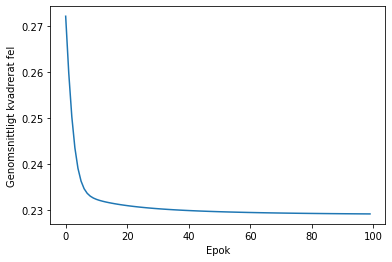

In [ ]:
#@title
träningsdata=[[0, 1, 1, 1, 1], [0, 1, 1, 1, 0], [1, 1, 0, 1, 1], [0, 0, 1, 0, 1], [1, 0, 0, 0, 0], [1, 1, 0, 1, 1], [0, 0, 1, 1, 0], [1, 1, 1, 1, 1], [1, 0, 1, 1, 0], [1, 1, 1, 0, 1], [1, 1, 0, 0, 0], [0, 1, 1, 0, 1], [1, 0, 0, 1, 0], [0, 0, 1, 0, 0], [0, 1, 1, 1, 1], [0, 1, 1, 1, 0], [1, 0, 1, 1, 0], [0, 0, 0, 1, 1], [1, 1, 0, 1, 1], [1, 1, 1, 1, 1], [0, 0, 0, 1, 0], [1, 1, 1, 1, 0], [1, 0, 1, 0, 1], [0, 1, 1, 1, 0], [0, 0, 0, 0, 1], [0, 1, 1, 1, 1], [1, 0, 1, 1, 0], [0, 1, 0, 0, 0], [0, 0, 0, 1, 0], [0, 1, 1, 1, 1], [1, 0, 1, 1, 0], [1, 0, 1, 1, 1], [1, 1, 1, 0, 0], [0, 1, 1, 1, 0], [1, 0, 1, 1, 0], [0, 1, 0, 0, 1], [0, 0, 1, 1, 0], [0, 1, 1, 1, 1], [1, 0, 0, 0, 0], [0, 1, 0, 1, 1], [1, 1, 1, 1, 0], [0, 0, 0, 1, 1], [1, 1, 1, 1, 1], [0, 0, 1, 1, 0], [1, 0, 1, 0, 1], [1, 1, 1, 1, 0], [1, 0, 0, 1, 1], [1, 1, 1, 1, 0], [0, 0, 0, 0, 1], [0, 1, 1, 1, 0], [1, 0, 0, 0, 0], [0, 0, 0, 1, 1], [1, 0, 1, 1, 0], [1, 0, 0, 1, 0], [0, 1, 1, 1, 0], [1, 0, 1, 0, 1], [0, 0, 1, 1, 0]]
etiketter=[0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0]


import matplotlib.pyplot as plt
import numpy as np
def sigma(x):
    return 1 / (1 + np.exp(-x))

X = np.array(träningsdata)
Y = np.array(etiketter)

w_0 = 1
w_1 = 1
b = 0
alpha = 0.1
epochs = 100
e = 0
genfel = []

while e < epochs:
    dw_0 = 0
    dw_1 = 0
    db = 0
    n = 0
    while n < len(träningsdata):
        x = X[n]
        x_0 = x[3]
        x_1 = x[4]
        y = Y[n]
        y_hat = sigma(w_0 * x_0 + w_1 * x_1 + b)
        dw_0 += 2 * (y_hat - y) * y_hat * (1 - y_hat) * x_0 / 4
        dw_1 += 2 * (y_hat - y) * y_hat * (1 - y_hat) * x_1 / 4
        db += 2 * (y_hat - y) * y_hat * (1 - y_hat) / 4
        n += 1
    w_0 -= alpha * dw_0
    w_1 -= alpha * dw_1
    b -= alpha * db
    n = 0
    temp1 = 0
    while n < len(träningsdata):
      x = X[n]
      x_0 = x[3]
      x_1 = x[4]
      y = Y[n]
      y_hat = sigma(w_0 * x_0 + w_1 * x_1 + b)
      #print(x, y, y_hat, sep="\t")
      temp1 += (y_hat - y) ** 2
      n += 1
    #print(temp1/len(perceptronlista)) #genomsnittliga kvadrerade felet
    genfel.append(temp1/len(träningsdata))
    e += 1
print(temp1/len(träningsdata))

temp1 = 0



print()
print("w_0 =", w_0)
print("w_1 =", w_1)
print("b =", b)
#print(genfel)
plt.plot(genfel)
plt.ylabel("Genomsnittligt kvadrerat fel")
plt.xlabel("Epok")
plt.show()

In [ ]:
#@title
utvärderingsdata=[[1, 0, 1, 1, 1], [1, 0, 0, 0, 0], [0, 0, 1, 1, 1], [1, 1, 1, 1, 0], [1, 1, 0, 1, 0], [0, 1, 0, 1, 1], [1, 1, 1, 1, 1], [1, 1, 0, 0, 0], [0, 0, 1, 1, 0], [1, 1, 1, 1, 1], [1, 0, 1, 0, 0], [0, 1, 0, 1, 1], [0, 0, 1, 1, 0], [1, 0, 1, 0, 1], [0, 1, 1, 1, 0], [0, 1, 1, 1, 1], [1, 0, 0, 1, 0], [0, 1, 1, 1, 1], [0, 1, 0, 1, 0], [1, 0, 1, 1, 1], [1, 0, 0, 0, 1], [0, 1, 1, 0, 0], [0, 1, 1, 1, 0], [1, 1, 1, 1, 0], [1, 1, 1, 1, 0], [1, 0, 1, 1, 1], [0, 0, 0, 0, 1], [1, 0, 0, 0, 0], [0, 1, 1, 1, 1], [0, 1, 0, 1, 0], [1, 1, 0, 1, 1], [1, 1, 1, 1, 0], [1, 1, 1, 1, 1], [1, 1, 0, 1, 1], [0, 1, 1, 1, 0], [1, 0, 1, 0, 0], [0, 0, 1, 1, 1], [1, 1, 0, 1, 0], [0, 1, 1, 1, 0], [1, 1, 0, 1, 0], [0, 1, 0, 0, 0], [0, 1, 1, 1, 1], [1, 0, 1, 1, 1], [0, 0, 1, 1, 1], [1, 0, 1, 0, 0], [0, 1, 0, 1, 0], [0, 0, 0, 0, 1], [1, 0, 1, 0, 0], [0, 1, 1, 1, 0], [1, 1, 0, 1, 0], [1, 0, 1, 1, 1], [0, 0, 1, 1, 1], [1, 0, 0, 0, 1], [1, 0, 1, 1, 1], [1, 1, 0, 1, 1], [0, 0, 1, 1, 1]]
utvärderingsetikett=[1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1]


def sigma(x):
    return 1 / (1 + np.exp(-x))

w_3 = 1.1174411495248908
w_4 = 0.6173137120154029
b = -1.028659992197887
X = np.array(utvärderingsdata)
Y = np.array(utvärderingsetikett)
n = 0
temp1 = 0
while n < (len(utvärderingsdata)):
  x = X[n]
  x_3 = x[3]
  x_4 = x[4]
  y = Y[n]
  y_hat = sigma(w_4 * x_4 + w_3 * x_3 + b)
  temp1 += (y_hat - y) ** 2
  n += 1
print(temp1/len(utvärderingsdata))

0.19553919456678456


Kod som vänder på listan med etiketter och perceptroner och fördelar dem med samma förhållande som tidigare. MÅSTE HA IDIOT INTE TA BORT
(TOTTENHORHAM)

In [ ]:
#@title
perceptronlista = [[0, 1, 1, 1, 1], [0, 1, 1, 1, 0], [1, 1, 0, 1, 1], [0, 0, 1, 0, 1], [1, 0, 0, 0, 0], [1, 1, 0, 1, 1], [0, 0, 1, 1, 0], [1, 1, 1, 1, 1], [1, 0, 1, 1, 0], [1, 1, 1, 0, 1], [1, 1, 0, 0, 0], [0, 1, 1, 0, 1], [1, 0, 0, 1, 0], [0, 0, 1, 0, 0], [0, 1, 1, 1, 1], [0, 1, 1, 1, 0], [1, 0, 1, 1, 0], [0, 0, 0, 1, 1], [1, 1, 0, 1, 1], [1, 1, 1, 1, 1], [0, 0, 0, 1, 0], [1, 1, 1, 1, 0], [1, 0, 1, 0, 1], [0, 1, 1, 1, 0], [0, 0, 0, 0, 1], [0, 1, 1, 1, 1], [1, 0, 1, 1, 0], [0, 1, 0, 0, 0], [0, 0, 0, 1, 0], [0, 1, 1, 1, 1], [1, 0, 1, 1, 0], [1, 0, 1, 1, 1], [1, 1, 1, 0, 0], [0, 1, 1, 1, 0], [1, 0, 1, 1, 0], [0, 1, 0, 0, 1], [0, 0, 1, 1, 0], [0, 1, 1, 1, 1], [1, 0, 0, 0, 0], [0, 1, 0, 1, 1], [1, 1, 1, 1, 0], [0, 0, 0, 1, 1], [1, 1, 1, 1, 1], [0, 0, 1, 1, 0], [1, 0, 1, 0, 1], [1, 1, 1, 1, 0], [1, 0, 0, 1, 1], [1, 1, 1, 1, 0], [0, 0, 0, 0, 1], [0, 1, 1, 1, 0], [1, 0, 0, 0, 0], [0, 0, 0, 1, 1], [1, 0, 1, 1, 0], [1, 0, 0, 1, 0], [0, 1, 1, 1, 0], [1, 0, 1, 0, 1], [0, 0, 1, 1, 0], [0, 0, 1, 1, 1], [1, 1, 0, 1, 1], [1, 0, 1, 1, 1], [1, 0, 0, 0, 1], [0, 0, 1, 1, 1], [1, 0, 1, 1, 1], [1, 1, 0, 1, 0], [0, 1, 1, 1, 0], [1, 0, 1, 0, 0], [0, 0, 0, 0, 1], [0, 1, 0, 1, 0], [1, 0, 1, 0, 0], [0, 0, 1, 1, 1], [1, 0, 1, 1, 1], [0, 1, 1, 1, 1], [0, 1, 0, 0, 0], [1, 1, 0, 1, 0], [0, 1, 1, 1, 0], [1, 1, 0, 1, 0], [0, 0, 1, 1, 1], [1, 0, 1, 0, 0], [0, 1, 1, 1, 0], [1, 1, 0, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 0], [1, 1, 0, 1, 1], [0, 1, 0, 1, 0], [0, 1, 1, 1, 1], [1, 0, 0, 0, 0], [0, 0, 0, 0, 1], [1, 0, 1, 1, 1], [1, 1, 1, 1, 0]]
etikettlista = [0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1]

perceptronlista2 = [[1, 0, 1, 1, 1], [1, 0, 0, 0, 0], [0, 0, 1, 1, 1], [1, 1, 1, 1, 0], [1, 1, 0, 1, 0], [0, 1, 0, 1, 1], [1, 1, 1, 1, 1], [1, 1, 0, 0, 0], [0, 0, 1, 1, 0], [1, 1, 1, 1, 1], [1, 0, 1, 0, 0], [0, 1, 0, 1, 1], [0, 0, 1, 1, 0], [1, 0, 1, 0, 1], [0, 1, 1, 1, 0], [0, 1, 1, 1, 1], [1, 0, 0, 1, 0], [0, 1, 1, 1, 1], [0, 1, 0, 1, 0], [1, 0, 1, 1, 1], [1, 0, 0, 0, 1], [0, 1, 1, 0, 0], [0, 1, 1, 1, 0], [1, 1, 1, 1, 0]]
etikettlista2 = [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1]

for i in perceptronlista2:
  perceptronlista.append(i)

for i in etikettlista2:
  etikettlista.append(i)

revperceptronlista = []
revetikettlista = []

x = len(perceptronlista)

for i in range(x):
  revperceptronlista.append(perceptronlista[-1])
  perceptronlista.pop(-1)

for i in range(x):
  revetikettlista.append(etikettlista[-1])
  etikettlista.pop(-1)

rev2per = []
rev2eti = []

for i in range(89):
  rev2per.append(revperceptronlista[0])
  revperceptronlista.pop(0)
  rev2eti.append(revetikettlista[0])
  revetikettlista.pop(0)

print(rev2per)
print(rev2eti)

print(revperceptronlista)
print(revetikettlista)

[[1, 1, 1, 1, 0], [0, 1, 1, 1, 0], [0, 1, 1, 0, 0], [1, 0, 0, 0, 1], [1, 0, 1, 1, 1], [0, 1, 0, 1, 0], [0, 1, 1, 1, 1], [1, 0, 0, 1, 0], [0, 1, 1, 1, 1], [0, 1, 1, 1, 0], [1, 0, 1, 0, 1], [0, 0, 1, 1, 0], [0, 1, 0, 1, 1], [1, 0, 1, 0, 0], [1, 1, 1, 1, 1], [0, 0, 1, 1, 0], [1, 1, 0, 0, 0], [1, 1, 1, 1, 1], [0, 1, 0, 1, 1], [1, 1, 0, 1, 0], [1, 1, 1, 1, 0], [0, 0, 1, 1, 1], [1, 0, 0, 0, 0], [1, 0, 1, 1, 1], [1, 1, 1, 1, 0], [1, 0, 1, 1, 1], [0, 0, 0, 0, 1], [1, 0, 0, 0, 0], [0, 1, 1, 1, 1], [0, 1, 0, 1, 0], [1, 1, 0, 1, 1], [1, 1, 1, 1, 0], [1, 1, 1, 1, 1], [1, 1, 0, 1, 1], [0, 1, 1, 1, 0], [1, 0, 1, 0, 0], [0, 0, 1, 1, 1], [1, 1, 0, 1, 0], [0, 1, 1, 1, 0], [1, 1, 0, 1, 0], [0, 1, 0, 0, 0], [0, 1, 1, 1, 1], [1, 0, 1, 1, 1], [0, 0, 1, 1, 1], [1, 0, 1, 0, 0], [0, 1, 0, 1, 0], [0, 0, 0, 0, 1], [1, 0, 1, 0, 0], [0, 1, 1, 1, 0], [1, 1, 0, 1, 0], [1, 0, 1, 1, 1], [0, 0, 1, 1, 1], [1, 0, 0, 0, 1], [1, 0, 1, 1, 1], [1, 1, 0, 1, 1], [0, 0, 1, 1, 1], [0, 0, 1, 1, 0], [1, 0, 1, 0, 1], [0, 1, 1, 1, 

Kod för att testa omvänd ordning

0.15488342985175296
0.29909351285384245

w_0 = -0.9708534403566775
w_1 = 0.322641320836191
w_2 = 1.3737218841347278
w_3 = 2.3093493751702114
w_4 = 1.5007615409164616
b = -2.6760803137925993


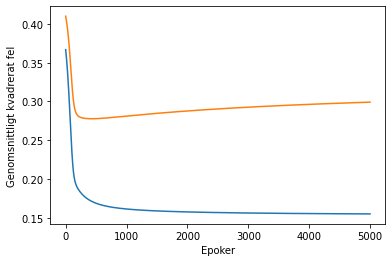

In [ ]:
#@title
#träningsdata
perceptronlista = [[1, 1, 1, 1, 0], [0, 1, 1, 1, 0], [0, 1, 1, 0, 0], [1, 0, 0, 0, 1], [1, 0, 1, 1, 1], [0, 1, 0, 1, 0], [0, 1, 1, 1, 1], [1, 0, 0, 1, 0], [0, 1, 1, 1, 1], [0, 1, 1, 1, 0], [1, 0, 1, 0, 1], [0, 0, 1, 1, 0], [0, 1, 0, 1, 1], [1, 0, 1, 0, 0], [1, 1, 1, 1, 1], [0, 0, 1, 1, 0], [1, 1, 0, 0, 0], [1, 1, 1, 1, 1], [0, 1, 0, 1, 1], [1, 1, 0, 1, 0], [1, 1, 1, 1, 0], [0, 0, 1, 1, 1], [1, 0, 0, 0, 0], [1, 0, 1, 1, 1], [1, 1, 1, 1, 0], [1, 0, 1, 1, 1], [0, 0, 0, 0, 1], [1, 0, 0, 0, 0], [0, 1, 1, 1, 1], [0, 1, 0, 1, 0], [1, 1, 0, 1, 1], [1, 1, 1, 1, 0], [1, 1, 1, 1, 1], [1, 1, 0, 1, 1], [0, 1, 1, 1, 0], [1, 0, 1, 0, 0], [0, 0, 1, 1, 1], [1, 1, 0, 1, 0], [0, 1, 1, 1, 0], [1, 1, 0, 1, 0], [0, 1, 0, 0, 0], [0, 1, 1, 1, 1], [1, 0, 1, 1, 1], [0, 0, 1, 1, 1], [1, 0, 1, 0, 0], [0, 1, 0, 1, 0], [0, 0, 0, 0, 1], [1, 0, 1, 0, 0], [0, 1, 1, 1, 0], [1, 1, 0, 1, 0], [1, 0, 1, 1, 1], [0, 0, 1, 1, 1], [1, 0, 0, 0, 1], [1, 0, 1, 1, 1], [1, 1, 0, 1, 1], [0, 0, 1, 1, 1], [0, 0, 1, 1, 0], [1, 0, 1, 0, 1], [0, 1, 1, 1, 0], [1, 0, 0, 1, 0], [1, 0, 1, 1, 0], [0, 0, 0, 1, 1], [1, 0, 0, 0, 0], [0, 1, 1, 1, 0], [0, 0, 0, 0, 1], [1, 1, 1, 1, 0], [1, 0, 0, 1, 1], [1, 1, 1, 1, 0], [1, 0, 1, 0, 1], [0, 0, 1, 1, 0], [1, 1, 1, 1, 1], [0, 0, 0, 1, 1], [1, 1, 1, 1, 0], [0, 1, 0, 1, 1], [1, 0, 0, 0, 0], [0, 1, 1, 1, 1], [0, 0, 1, 1, 0], [0, 1, 0, 0, 1], [1, 0, 1, 1, 0], [0, 1, 1, 1, 0], [1, 1, 1, 0, 0], [1, 0, 1, 1, 1], [1, 0, 1, 1, 0], [0, 1, 1, 1, 1], [0, 0, 0, 1, 0], [0, 1, 0, 0, 0], [1, 0, 1, 1, 0], [0, 1, 1, 1, 1], [0, 0, 0, 0, 1]]
etikettlista = [1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0]

#utvärderingsdata
perceptronlista2 = [[0, 1, 1, 1, 0], [1, 0, 1, 0, 1], [1, 1, 1, 1, 0], [0, 0, 0, 1, 0], [1, 1, 1, 1, 1], [1, 1, 0, 1, 1], [0, 0, 0, 1, 1], [1, 0, 1, 1, 0], [0, 1, 1, 1, 0], [0, 1, 1, 1, 1], [0, 0, 1, 0, 0], [1, 0, 0, 1, 0], [0, 1, 1, 0, 1], [1, 1, 0, 0, 0], [1, 1, 1, 0, 1], [1, 0, 1, 1, 0], [1, 1, 1, 1, 1], [0, 0, 1, 1, 0], [1, 1, 0, 1, 1], [1, 0, 0, 0, 0], [0, 0, 1, 0, 1], [1, 1, 0, 1, 1], [0, 1, 1, 1, 0], [0, 1, 1, 1, 1]]
etikettlista2 = [0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0]

import matplotlib.pyplot as plt
import numpy as np
def sigma(x):
    return 1 / (1 + np.exp(-x))

X = np.array(perceptronlista)
Y = np.array(etikettlista)
Xn = np.array(perceptronlista2)
Yn = np.array(etikettlista2)

w_0 = 1
w_1 = 1
w_2 = 1
w_3 = 1
w_4 = 1
b = 0
alpha = 0.1
epochs = 5000
e = 0
genfel = []
genfelu = []

while e < epochs:
    dw_0 = 0
    dw_1 = 0
    dw_2 = 0
    dw_3 = 0
    dw_4 = 0
    db = 0
    n = 0
    while n < len(perceptronlista):
        x = X[n]
        x_0 = x[0]
        x_1 = x[1]
        x_2 = x[2]
        x_3 = x[3]
        x_4 = x[4]
        y = Y[n]
        y_hat = sigma(w_4 * x_4 + w_3 * x_3 + w_2 * x_2 + w_0 * x_0 + w_1 * x_1 + b)
        dw_0 += 2 * (y_hat - y) * y_hat * (1 - y_hat) * x_0 / len(perceptronlista)
        dw_1 += 2 * (y_hat - y) * y_hat * (1 - y_hat) * x_1 / len(perceptronlista)
        dw_2 += 2 * (y_hat - y) * y_hat * (1 - y_hat) * x_2 / len(perceptronlista)
        dw_3 += 2 * (y_hat - y) * y_hat * (1 - y_hat) * x_3 / len(perceptronlista)
        dw_4 += 2 * (y_hat - y) * y_hat * (1 - y_hat) * x_4 / len(perceptronlista)
        db += 2 * (y_hat - y) * y_hat * (1 - y_hat) / len(perceptronlista)
        n += 1
    w_0 -= alpha * dw_0
    w_1 -= alpha * dw_1
    w_2 -= alpha * dw_2
    w_3 -= alpha * dw_3
    w_4 -= alpha * dw_4
    b -= alpha * db
    n = 0
    temp1 = 0

    nu = 0
    temp1u = 0
    y_hatn = 0
    yn = 0

    while n < len(perceptronlista):
      x = X[n]
      x_0 = x[0]
      x_1 = x[1]
      x_2 = x[2]
      x_3 = x[3]
      x_4 = x[4]
      y = Y[n]
      y_hat = sigma(w_4 * x_4 + w_3 * x_3 + w_2 * x_2 + w_0 * x_0 + w_1 * x_1 + b)
      #print(x, y, y_hat, sep="\t")
      temp1 += (y_hat - y) ** 2
      n += 1
    #print(temp1/len(perceptronlista)) #genomsnittliga kvadrerade felet
    genfel.append(temp1/len(perceptronlista))

    while nu < (len(perceptronlista2)):
      
      xn = Xn[nu]
      ux_0 = xn[0]
      ux_1 = xn[1]
      ux_2 = xn[2]
      ux_3 = xn[3]
      ux_4 = xn[4]
      yn = Yn[nu]
      y_hatn = sigma(w_4 * ux_4 + w_3 * ux_3 + w_2 * ux_2 + w_1 * ux_1 + w_0 * ux_0 + b)
      temp1u += (y_hatn - yn) ** 2
      #print(y_hatn, yn)
      nu += 1

    genfelu.append(temp1u/len(etikettlista2))

    e += 1
print(temp1/len(perceptronlista))
print(temp1u/len(perceptronlista2))




print()
print("w_0 =", w_0)
print("w_1 =", w_1)
print("w_2 =", w_2)
print("w_3 =", w_3)
print("w_4 =", w_4)
print("b =", b)
#print(genfel)

plt.plot(genfel)
plt.plot(genfelu)
plt.ylabel("Genomsnittligt kvadrerat fel")
plt.xlabel("Epoker")
plt.show()





In [ ]:
#@title
Uperceptroner = [[0, 1, 1, 1, 0], [1, 0, 1, 0, 1], [1, 1, 1, 1, 0], [0, 0, 0, 1, 0], [1, 1, 1, 1, 1], [1, 1, 0, 1, 1], [0, 0, 0, 1, 1], [1, 0, 1, 1, 0], [0, 1, 1, 1, 0], [0, 1, 1, 1, 1], [0, 0, 1, 0, 0], [1, 0, 0, 1, 0], [0, 1, 1, 0, 1], [1, 1, 0, 0, 0], [1, 1, 1, 0, 1], [1, 0, 1, 1, 0], [1, 1, 1, 1, 1], [0, 0, 1, 1, 0], [1, 1, 0, 1, 1], [1, 0, 0, 0, 0], [0, 0, 1, 0, 1], [1, 1, 0, 1, 1], [0, 1, 1, 1, 0], [0, 1, 1, 1, 1]]
Uetiketter = [0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0]
def sigma(x):
    return 1 / (1 + np.exp(-x))

uw_0 = -0.8036208130266569
uw_1 = 0.27686837060705183
uw_2 = 1.0074243404272982
uw_3 = 1.5113619083456757
uw_4 = 1.0002534341344966
ub = -1.6781642234085403
uX = np.array(Uperceptroner)
uY = np.array(Uetiketter)
un = 0
utemp1 = 0

while un < (len(Uperceptroner)):
  ux = uX[un]
  ux_0 = ux[0]
  ux_1 = ux[1]
  ux_2 = ux[2]
  ux_3 = ux[3]
  ux_4 = ux[4]
  uy = uY[un]
  uy_hat = sigma(w_4 * x_4 + w_3 * x_3 + w_2 * x_2 + w_0 * x_0 + w_1 * x_1 + b)
  utemp1 += (y_hat - uy) ** 2
  un += 1
print(utemp1/len(Uperceptroner))

0.2902638475603186


NY DATA 

In [ ]:
import pandas as pd
import numpy as np
path = "/content/final_dataset.csv"
results = [] # Målskillnad för valt lag
formdiff = []
selected_team = "Chelsea" # Välj lag
with open(path, "r") as f:
    for line in f:
        match_data = line.split(",")
        if match_data[2] == selected_team:
            results += [int(match_data[4]) - int(match_data[5])]
        if match_data[3] == selected_team:
            results += [int(match_data[5]) - int(match_data[4])]

#formfaktor.
with open(path, "r") as f:
  for line in f:
    match_data = line.split(",")
    if match_data[2] == selected_team:
      formdiff += [int(match_data[26]) - int(match_data[27])]
    if match_data[3] == selected_team:
      formdiff += [int(match_data[27]) - int(match_data[26])]

#hemma/borta
hemmaborta = []
with open(path, "r") as f:
  for line in f: 
    match_data = line.split(",")
    if match_data[2] == selected_team:
      hemmaborta.append(1)
    if match_data[3] == selected_team:
      hemmaborta.append(0)

#gör om datan i formdiff till 1/0
formdifffix = []
for i in formdiff:
  if int(i) < 0 or int(i) == 0:
    formdifffix.append(0)
  else:
    formdifffix.append(1)

#big6
big6 = []
with open(path, "r") as f:
  for line in f: 
    match_data = line.split(",")
    if match_data[2] == selected_team:
      if match_data[3] == "Arsenal" or match_data[3] == "Man United" or match_data[3] == "Man City" or match_data[3] == "Liverpool" or match_data[3] == "Tottenham":
        big6.append(0)
      else:
        big6.append(1)
    if match_data[3] == selected_team:
      if match_data[2] == "Arsenal" or match_data[2] == "Man United" or match_data[2] == "Man City" or match_data[2] == "Liverpool" or match_data[2] == "Tottenham":
        big6.append(0)
      else:
        big6.append(1)

print(*results)
wins = np.array(np.array(results) > 0, dtype=int) # Vinster för valt lag. 1: vinst, 0: lika eller förlust
print(*wins)
print(len(results))
print("formdiff: ", formdiff)
print("formdifffix: ", formdifffix)
print("hemmaborta: ", hemmaborta)
print("big6: ", big6)

biglist = []

for i in range(len(big6)):
  temp = []
  temp.append(formdifffix[int(i)])
  temp.append(hemmaborta[int(i)])
  temp.append(big6[int(i)])
  biglist.append(temp)
print(biglist)

2 -2 0 0 0 -2 0 3 -1 5 3 -1 0 -2 -1 1 3 -1 3 0 1 0 3 2 -1 0 0 2 -2 1 4 1 3 -1 -2 1 0 1 0 2 0 1 0 0 2 0 -1 0 1 0 0 3 -1 0 4 4 -1 1 -2 0 4 2 1 0 -1 1 4 4 -1 1 0 3 0 -3 2 -2 1 0 0 0 1 3 0 -1 -1 3 2 0 3 1 0 3 2 0 2 0 -2 -1 3 -1 1 0 2 -1 -1 2 5 1 1 -1 3 0 -1 1 1 1 0 2 5 1 1 0 -1 1 1 5 1 1 0 -1 1 -2 3 -1 4 0 1 1 2 -1 1 2 1 3 1 0 -1 0 -1 4 0 1 1 1 2 1 0 0 1 1 -1 4 3 1 3 0 4 4 0 4 1 2 1 2 2 3 1 0 1 2 1 3 2 0 0 2 2 1 2 0 1 1 4 2 2 2 1 3 4 0 2 -1 3 2 1 1 2 1 1 2 2 1 0 0 2 -3 2 1 1 -1 2 0 3 2 3 3 -1 -1 3 -1 2 1 1 2 0 1 1 2 -1 4 1 0 1 0 1 1 1 0 0 0 4 -2 3 1 3 2 1 3 1 1 3 0 0 0 0 0 1 1 0 1 -2 0 -2 0 1 2 6 2 0 2 1 2 -1 1 0 1 1 2 1 1 0 0 4 5 1 0 1 1 2 0 1 1 2 0 4 1 0 2 0 2 2 5 -1 3 5 2 3 0 -1 2 0 0 2 0 -3 1 2 -2 0 1 1 1 1 -1 2 1 0 1 2 3 2 1 1 2 2 3 1 3 -2 2 -1 5 4 1 4 3 -1 0 1 0 0 1 5 3 1 0 2 -1 2 -2 3 0 5 6 1 1 -1 7 2 8 6 6 2 2 4 -1 2 0 2 1 -2 1 -3 -1 0 0 0 -2 1 0 -1 2 4 2 -1 0 1 2 2 0 1 2 2 3 1 -1 0 -1 0 1 2 1 -2 3 4 2 -1 -2 1 -1 3 3 1 0 0 0 -2 1 1 0 0 0 -2 3 -1 1 -1 0 2 1 0 0 5 -2 -3 1 2 2 2 0 1 1

In [ ]:
perceptronlista = [[0, 1, 1], [1, 0, 1], [1, 0, 1], [0, 1, 0], [0, 0, 1], [0, 1, 1], [0, 0, 0], [0, 1, 0], [0, 0, 1], [0, 1, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [0, 0, 1], [1, 1, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 1, 1], [1, 0, 1], [0, 1, 0], [1, 0, 1], [1, 0, 1], [1, 1, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1], [0, 0, 1], [1, 1, 1], [0, 0, 0], [0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [0, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [0, 1, 0], [1, 1, 1], [0, 0, 0], [0, 0, 1], [0, 1, 1], [1, 0, 1], [0, 1, 1], [0, 1, 1], [1, 0, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1], [1, 1, 0], [1, 1, 1], [0, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 0], [1, 0, 1], [1, 1, 1], [0, 0, 1], [0, 1, 0], [1, 0, 1], [0, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 0], [1, 0, 0], [1, 1, 1], [1, 0, 0], [0, 1, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1], [1, 0, 1], [1, 0, 0], [0, 1, 1], [0, 0, 0], [0, 1, 1], [0, 1, 0], [1, 0, 1], [1, 1, 1], [0, 0, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 1], [0, 1, 0], [0, 0, 0], [1, 1, 1], [1, 1, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 0, 0], [1, 1, 0], [1, 0, 1], [0, 1, 1], [1, 0, 1], [0, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1], [1, 0, 1], [0, 1, 0], [1, 0, 0], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [0, 1, 1], [0, 0, 0], [1, 1, 1], [0, 1, 0], [1, 0, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 1, 0], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 1, 1], [1, 0, 1], [1, 0, 0], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 1, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 0], [1, 0, 1], [0, 0, 1], [0, 1, 0], [1, 1, 1], [1, 0, 0], [1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 1, 0], [1, 0, 1], [0, 0, 1], [0, 1, 0], [1, 0, 1], [1, 0, 1], [1, 1, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 0, 0], [1, 1, 1], [1, 1, 1], [0, 0, 0], [1, 0, 1], [1, 1, 0], [0, 1, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 0], [0, 1, 1], [0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [0, 1, 0], [1, 0, 1], [1, 0, 1], [1, 1, 1], [0, 0, 0], [0, 1, 0], [0, 1, 1], [0, 1, 1], [1, 0, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 0], [1, 1, 1], [0, 0, 1], [1, 0, 1], [0, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 0, 0], [1, 1, 0], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1], [0, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 0], [0, 0, 1], [1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1], [1, 1, 0], [0, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [0, 0, 0], [1, 1, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 0], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1], [0, 0, 0], [1, 1, 1], [1, 0, 1], [0, 1, 1], [0, 0, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [0, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 0], [1, 1, 1], [1, 0, 0], [1, 0, 0], [1, 1, 1], [1, 1, 1], [1, 0, 1], [0, 0, 1], [0, 1, 1], [1, 1, 1], [1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 0, 1], [1, 1, 0], [1, 1, 1], [1, 0, 1], [1, 0, 1], [0, 1, 1], [0, 0, 0], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 0], [1, 1, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 0, 0], [1, 1, 1], [1, 1, 1], [1, 0, 1], [0, 0, 1], [1, 1, 1], [0, 0, 0], [0, 0, 0], [0, 1, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 1], [1, 0, 1], [0, 1, 0], [1, 0, 1], [0, 1, 0], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 1, 0], [1, 0, 0], [1, 1, 1], [1, 0, 1], [0, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 1], [0, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [0, 1, 0], [1, 1, 1], [0, 0, 1], [0, 1, 0], [1, 0, 1], [0, 0, 0], [1, 1, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [1, 0, 1], [1, 1, 1], [0, 0, 1], [0, 1, 1], [0, 0, 0], [1, 1, 0], [1, 0, 1], [0, 1, 1], [1, 0, 1], [0, 0, 0], [1, 1, 1], [0, 1, 1], [1, 0, 0], [1, 1, 1], [0, 0, 1], [1, 1, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1], [0, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [0, 0, 1], [0, 0, 1], [0, 1, 1], [0, 0, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 1, 0], [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 0, 0], [0, 1, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 0, 0], [1, 1, 1], [1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1], [0, 1, 1], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 1], [0, 0, 0], [1, 0, 1], [1, 1, 1], [0, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 0, 1], [0, 1, 1], [1, 0, 0], [1, 1, 1], [0, 1, 0], [1, 0, 1], [1, 0, 1], [1, 1, 0], [1, 1, 1], [0, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 0], [1, 1, 1], [1, 0, 1], [0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1], [1, 0, 0], [1, 1, 1], [1, 1, 0], [1, 0, 1], [1, 0, 0], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1], [1, 0, 1], [0, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 0], [0, 0, 0], [1, 0, 1], [1, 1, 1], [1, 1, 0], [1, 0, 1], [0, 1, 1], [0, 1, 1], [0, 0, 0], [0, 0, 1], [0, 1, 1], [0, 0, 1], [0, 1, 0], [1, 0, 1], [0, 1, 1], [1, 1, 1], [0, 0, 1], [0, 1, 0], [0, 0, 1], [0, 1, 1], [0, 0, 0], [1, 1, 1], [0, 0, 1], [0, 1, 1], [0, 1, 1], [1, 0, 0], [0, 0, 1], [1, 1, 1], [1, 1, 1], [0, 0, 0], [1, 0, 1], [0, 1, 0], [0, 1, 1], [0, 0, 1], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 1], [1, 0, 1], [0, 1, 0], [1, 0, 1], [0, 1, 0], [0, 0, 1], [0, 0, 0], [0, 1, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 0], [0, 0, 0], [1, 0, 1], [0, 1, 1], [1, 1, 0], [0, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 1], [1, 0, 0], [0, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1], [1, 1, 0], [1, 0, 1], [0, 0, 0], [1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 1, 1], [0, 1, 1], [0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [0, 1, 0], [1, 0, 1], [0, 1, 1], [0, 0, 1], [0, 1, 0], [1, 0, 1], [1, 0, 0], [1, 1, 1], [1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 0], [0, 0, 0], [1, 1, 1], [0, 1, 0], [0, 1, 1], [1, 0, 1], [0, 0, 1], [1, 0, 1], [1, 1, 0], [1, 1, 1], [1, 0, 1]]
lista2 = []

for i in range(100):
  lista2.append(perceptronlista[-101+i])
for i in range(100):
  perceptronlista.pop(-1)

print(lista2, len(lista2))
print(perceptronlista, len(perceptronlista))

etilist2 = []

wins = [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0]

for i in range(100):
  etilist2.append(wins[-101+i])
for i in range(100):
  wins.pop(-1)

print(len(wins), wins)
print(len(etilist2), etilist2)


[[0, 0, 0], [1, 1, 1], [0, 0, 1], [0, 1, 1], [0, 1, 1], [1, 0, 0], [0, 0, 1], [1, 1, 1], [1, 1, 1], [0, 0, 0], [1, 0, 1], [0, 1, 0], [0, 1, 1], [0, 0, 1], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 1], [1, 0, 1], [0, 1, 0], [1, 0, 1], [0, 1, 0], [0, 0, 1], [0, 0, 0], [0, 1, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 0], [0, 0, 0], [1, 0, 1], [0, 1, 1], [1, 1, 0], [0, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 1], [1, 0, 0], [0, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1], [1, 1, 0], [1, 0, 1], [0, 0, 0], [1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 1, 1], [0, 1, 1], [0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [0, 1, 0], [1, 0, 1], [0, 1, 1], [0, 0, 1], [0, 1, 0], [1, 0, 1], [1, 0, 0], [1, 1, 1], [1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 0]

0.22309853500494964

w_0 = 0.4391389554308696
w_1 = 0.8193577743057447
w_2 = 0.6188418784730918
w_3 = 0.8193577743057447
w_4 = 0.6188418784730918
b = -0.7356766594128425


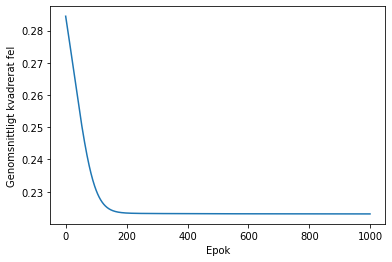

0.2284143531925501


In [ ]:
#vi behöver fixa vikter etc. sen köra denna.

#träningsdata
perceptronlista = [[0, 1, 1], [1, 0, 1], [1, 0, 1], [0, 1, 0], [0, 0, 1], [0, 1, 1], [0, 0, 0], [0, 1, 0], [0, 0, 1], [0, 1, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [0, 0, 1], [1, 1, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 1, 1], [1, 0, 1], [0, 1, 0], [1, 0, 1], [1, 0, 1], [1, 1, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1], [0, 0, 1], [1, 1, 1], [0, 0, 0], [0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [0, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [0, 1, 0], [1, 1, 1], [0, 0, 0], [0, 0, 1], [0, 1, 1], [1, 0, 1], [0, 1, 1], [0, 1, 1], [1, 0, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1], [1, 1, 0], [1, 1, 1], [0, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 0], [1, 0, 1], [1, 1, 1], [0, 0, 1], [0, 1, 0], [1, 0, 1], [0, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 0], [1, 0, 0], [1, 1, 1], [1, 0, 0], [0, 1, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1], [1, 0, 1], [1, 0, 0], [0, 1, 1], [0, 0, 0], [0, 1, 1], [0, 1, 0], [1, 0, 1], [1, 1, 1], [0, 0, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 1], [0, 1, 0], [0, 0, 0], [1, 1, 1], [1, 1, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 0, 0], [1, 1, 0], [1, 0, 1], [0, 1, 1], [1, 0, 1], [0, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1], [1, 0, 1], [0, 1, 0], [1, 0, 0], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [0, 1, 1], [0, 0, 0], [1, 1, 1], [0, 1, 0], [1, 0, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 1, 0], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 1, 1], [1, 0, 1], [1, 0, 0], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 1, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 0], [1, 0, 1], [0, 0, 1], [0, 1, 0], [1, 1, 1], [1, 0, 0], [1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 1, 0], [1, 0, 1], [0, 0, 1], [0, 1, 0], [1, 0, 1], [1, 0, 1], [1, 1, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 0, 0], [1, 1, 1], [1, 1, 1], [0, 0, 0], [1, 0, 1], [1, 1, 0], [0, 1, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 0], [0, 1, 1], [0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [0, 1, 0], [1, 0, 1], [1, 0, 1], [1, 1, 1], [0, 0, 0], [0, 1, 0], [0, 1, 1], [0, 1, 1], [1, 0, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 0], [1, 1, 1], [0, 0, 1], [1, 0, 1], [0, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 0, 0], [1, 1, 0], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1], [0, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 0], [0, 0, 1], [1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1], [1, 1, 0], [0, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [0, 0, 0], [1, 1, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 0], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1], [0, 0, 0], [1, 1, 1], [1, 0, 1], [0, 1, 1], [0, 0, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [0, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 0], [1, 1, 1], [1, 0, 0], [1, 0, 0], [1, 1, 1], [1, 1, 1], [1, 0, 1], [0, 0, 1], [0, 1, 1], [1, 1, 1], [1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 0, 1], [1, 1, 0], [1, 1, 1], [1, 0, 1], [1, 0, 1], [0, 1, 1], [0, 0, 0], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 0], [1, 1, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 0, 0], [1, 1, 1], [1, 1, 1], [1, 0, 1], [0, 0, 1], [1, 1, 1], [0, 0, 0], [0, 0, 0], [0, 1, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 1], [1, 0, 1], [0, 1, 0], [1, 0, 1], [0, 1, 0], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 1, 0], [1, 0, 0], [1, 1, 1], [1, 0, 1], [0, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 1], [0, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [0, 1, 0], [1, 1, 1], [0, 0, 1], [0, 1, 0], [1, 0, 1], [0, 0, 0], [1, 1, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [1, 0, 1], [1, 1, 1], [0, 0, 1], [0, 1, 1], [0, 0, 0], [1, 1, 0], [1, 0, 1], [0, 1, 1], [1, 0, 1], [0, 0, 0], [1, 1, 1], [0, 1, 1], [1, 0, 0], [1, 1, 1], [0, 0, 1], [1, 1, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1], [0, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [0, 0, 1], [0, 0, 1], [0, 1, 1], [0, 0, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 1, 0], [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 0, 0], [0, 1, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 0, 0], [1, 1, 1], [1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1], [0, 1, 1], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 1], [0, 0, 0], [1, 0, 1], [1, 1, 1], [0, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 0, 1], [0, 1, 1], [1, 0, 0], [1, 1, 1], [0, 1, 0], [1, 0, 1], [1, 0, 1], [1, 1, 0], [1, 1, 1], [0, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 0], [1, 1, 1], [1, 0, 1], [0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1], [1, 0, 0], [1, 1, 1], [1, 1, 0], [1, 0, 1], [1, 0, 0], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1], [1, 0, 1], [0, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 0], [0, 0, 0], [1, 0, 1], [1, 1, 1], [1, 1, 0], [1, 0, 1], [0, 1, 1], [0, 1, 1], [0, 0, 0], [0, 0, 1], [0, 1, 1], [0, 0, 1], [0, 1, 0], [1, 0, 1], [0, 1, 1], [1, 1, 1], [0, 0, 1], [0, 1, 0], [0, 0, 1], [0, 1, 1], [0, 0, 0]]
etikettlista = [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

#utvärderingsdata
perceptronlista2 = [[0, 0, 0], [1, 1, 1], [0, 0, 1], [0, 1, 1], [0, 1, 1], [1, 0, 0], [0, 0, 1], [1, 1, 1], [1, 1, 1], [0, 0, 0], [1, 0, 1], [0, 1, 0], [0, 1, 1], [0, 0, 1], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 1], [1, 0, 1], [0, 1, 0], [1, 0, 1], [0, 1, 0], [0, 0, 1], [0, 0, 0], [0, 1, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 0], [0, 0, 0], [1, 0, 1], [0, 1, 1], [1, 1, 0], [0, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 1], [1, 0, 0], [0, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1], [1, 1, 0], [1, 0, 1], [0, 0, 0], [1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 1, 1], [0, 1, 1], [0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [0, 1, 0], [1, 0, 1], [0, 1, 1], [0, 0, 1], [0, 1, 0], [1, 0, 1], [1, 0, 0], [1, 1, 1], [1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 0], [0, 0, 0], [1, 1, 1], [0, 1, 0], [0, 1, 1], [1, 0, 1], [0, 0, 1], [1, 0, 1], [1, 1, 0], [1, 1, 1]]
etikettlista2 = [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0]

import matplotlib.pyplot as plt
import numpy as np
def sigma(x):
    return 1 / (1 + np.exp(-x))

X = np.array(perceptronlista)
Y = np.array(etikettlista)

w_0 = 1
w_1 = 1
w_2 = 1
b = 0
alpha = 0.1
epochs = 1000
e = 0
genfel = []

while e < epochs:
    dw_0 = 0
    dw_1 = 0
    dw_2 = 0
    db = 0
    n = 0
    while n < len(perceptronlista):
        x = X[n]
        x_0 = x[0]
        x_1 = x[1]
        x_2 = x[2]
        y = Y[n]
        y_hat = sigma(w_2 * x_2 + w_0 * x_0 + w_1 * x_1 + b)
        dw_0 += 2 * (y_hat - y) * y_hat * (1 - y_hat) * x_0 / len(perceptronlista)
        dw_1 += 2 * (y_hat - y) * y_hat * (1 - y_hat) * x_1 / len(perceptronlista)
        dw_2 += 2 * (y_hat - y) * y_hat * (1 - y_hat) * x_2 / len(perceptronlista)
        db += 2 * (y_hat - y) * y_hat * (1 - y_hat) / len(perceptronlista)
        n += 1
    w_0 -= alpha * dw_0
    w_1 -= alpha * dw_1
    w_2 -= alpha * dw_2
    b -= alpha * db
    n = 0
    temp1 = 0
    while n < len(perceptronlista):
      x = X[n]
      x_0 = x[0]
      x_1 = x[1]
      x_2 = x[2]
      y = Y[n]
      y_hat = sigma(w_2 * x_2 + w_0 * x_0 + w_1 * x_1 + b)
      #print(x, y, y_hat, sep="\t")
      temp1 += (y_hat - y) ** 2
      n += 1
    #print(temp1/len(perceptronlista)) #genomsnittliga kvadrerade felet
    genfel.append(temp1/len(perceptronlista))
    e += 1
print(temp1/len(perceptronlista))

temp1 = 0



print()
print("w_0 =", w_0)
print("w_1 =", w_1)
print("w_2 =", w_2)
print("w_3 =", w_3)
print("w_4 =", w_4)
print("b =", b)
#print(genfel)

plt.plot(genfel)
plt.ylabel("Genomsnittligt kvadrerat fel")
plt.xlabel("Epok")
plt.show()






#UTVÄRDERING
def sigma(x):
    return 1 / (1 + np.exp(-x))

w_0 = 0.4391389554308696
w_3 = 0.8193577743057447
w_4 = 0.6188418784730918
b = -0.7356766594128425
X = np.array(perceptronlista2)
Y = np.array(etikettlista2)
n = 0
temp1 = 0
while n < (len(perceptronlista2)):
  x = X[n]
  x_0 = x[0]
  x_3 = x[1]
  x_4 = x[2]
  y = Y[n]
  y_hat = sigma(w_4 * x_4 + w_3 * x_3 + w_0 * x_0 + b)
  temp1 += (y_hat - y) ** 2
  n += 1
print(temp1/len(perceptronlista2))



0.22309853500494964

w_0 = 0.4391389554308696
w_1 = 0.8193577743057447
w_2 = 0.6188418784730918
b = -0.7356766594128425


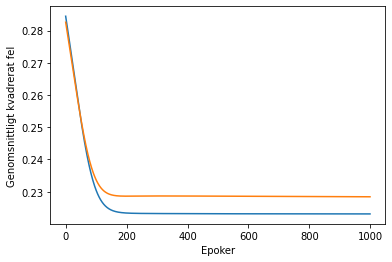

antal vinster  59
antal procent rätta gissningar på vinster  0.847457627118644
antal förluster  41
antal procent rätta gissningar på förlust/lika 0.34146341463414637
hur många procent av våra prediktioner som är rätt  0.64
0.22309853500494964
0.2284143531925501


In [ ]:
#vi behöver fixa vikter etc. sen köra denna.

#träningsdata
perceptronlista = [[0, 1, 1], [1, 0, 1], [1, 0, 1], [0, 1, 0], [0, 0, 1], [0, 1, 1], [0, 0, 0], [0, 1, 0], [0, 0, 1], [0, 1, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [0, 0, 1], [1, 1, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 1, 1], [1, 0, 1], [0, 1, 0], [1, 0, 1], [1, 0, 1], [1, 1, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1], [0, 0, 1], [1, 1, 1], [0, 0, 0], [0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [0, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [0, 1, 0], [1, 1, 1], [0, 0, 0], [0, 0, 1], [0, 1, 1], [1, 0, 1], [0, 1, 1], [0, 1, 1], [1, 0, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1], [1, 1, 0], [1, 1, 1], [0, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 0], [1, 0, 1], [1, 1, 1], [0, 0, 1], [0, 1, 0], [1, 0, 1], [0, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 0], [1, 0, 0], [1, 1, 1], [1, 0, 0], [0, 1, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1], [1, 0, 1], [1, 0, 0], [0, 1, 1], [0, 0, 0], [0, 1, 1], [0, 1, 0], [1, 0, 1], [1, 1, 1], [0, 0, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 1], [0, 1, 0], [0, 0, 0], [1, 1, 1], [1, 1, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 0, 0], [1, 1, 0], [1, 0, 1], [0, 1, 1], [1, 0, 1], [0, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1], [1, 0, 1], [0, 1, 0], [1, 0, 0], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [0, 1, 1], [0, 0, 0], [1, 1, 1], [0, 1, 0], [1, 0, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 1, 0], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 1, 1], [1, 0, 1], [1, 0, 0], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 1, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 0], [1, 0, 1], [0, 0, 1], [0, 1, 0], [1, 1, 1], [1, 0, 0], [1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 1, 0], [1, 0, 1], [0, 0, 1], [0, 1, 0], [1, 0, 1], [1, 0, 1], [1, 1, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 0, 0], [1, 1, 1], [1, 1, 1], [0, 0, 0], [1, 0, 1], [1, 1, 0], [0, 1, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 0], [0, 1, 1], [0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [0, 1, 0], [1, 0, 1], [1, 0, 1], [1, 1, 1], [0, 0, 0], [0, 1, 0], [0, 1, 1], [0, 1, 1], [1, 0, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 0], [1, 1, 1], [0, 0, 1], [1, 0, 1], [0, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 0, 0], [1, 1, 0], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1], [0, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 0], [0, 0, 1], [1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1], [1, 1, 0], [0, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [0, 0, 0], [1, 1, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 0], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1], [0, 0, 0], [1, 1, 1], [1, 0, 1], [0, 1, 1], [0, 0, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [0, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 0], [1, 1, 1], [1, 0, 0], [1, 0, 0], [1, 1, 1], [1, 1, 1], [1, 0, 1], [0, 0, 1], [0, 1, 1], [1, 1, 1], [1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 0, 1], [1, 1, 0], [1, 1, 1], [1, 0, 1], [1, 0, 1], [0, 1, 1], [0, 0, 0], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 0], [1, 1, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 0, 0], [1, 1, 1], [1, 1, 1], [1, 0, 1], [0, 0, 1], [1, 1, 1], [0, 0, 0], [0, 0, 0], [0, 1, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 1], [1, 0, 1], [0, 1, 0], [1, 0, 1], [0, 1, 0], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 1, 0], [1, 0, 0], [1, 1, 1], [1, 0, 1], [0, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 1], [0, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [0, 1, 0], [1, 1, 1], [0, 0, 1], [0, 1, 0], [1, 0, 1], [0, 0, 0], [1, 1, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [1, 0, 1], [1, 1, 1], [0, 0, 1], [0, 1, 1], [0, 0, 0], [1, 1, 0], [1, 0, 1], [0, 1, 1], [1, 0, 1], [0, 0, 0], [1, 1, 1], [0, 1, 1], [1, 0, 0], [1, 1, 1], [0, 0, 1], [1, 1, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1], [0, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [0, 0, 1], [0, 0, 1], [0, 1, 1], [0, 0, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 1, 0], [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 0, 0], [0, 1, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 0, 0], [1, 1, 1], [1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1], [0, 1, 1], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 1], [0, 0, 0], [1, 0, 1], [1, 1, 1], [0, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 0, 1], [0, 1, 1], [1, 0, 0], [1, 1, 1], [0, 1, 0], [1, 0, 1], [1, 0, 1], [1, 1, 0], [1, 1, 1], [0, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 0], [1, 1, 1], [1, 0, 1], [0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1], [1, 0, 0], [1, 1, 1], [1, 1, 0], [1, 0, 1], [1, 0, 0], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1], [1, 0, 1], [0, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 0], [0, 0, 0], [1, 0, 1], [1, 1, 1], [1, 1, 0], [1, 0, 1], [0, 1, 1], [0, 1, 1], [0, 0, 0], [0, 0, 1], [0, 1, 1], [0, 0, 1], [0, 1, 0], [1, 0, 1], [0, 1, 1], [1, 1, 1], [0, 0, 1], [0, 1, 0], [0, 0, 1], [0, 1, 1], [0, 0, 0]]
etikettlista = [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

#utvärderingsdata
perceptronlista2 = [[0, 0, 0], [1, 1, 1], [0, 0, 1], [0, 1, 1], [0, 1, 1], [1, 0, 0], [0, 0, 1], [1, 1, 1], [1, 1, 1], [0, 0, 0], [1, 0, 1], [0, 1, 0], [0, 1, 1], [0, 0, 1], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 1], [1, 0, 1], [0, 1, 0], [1, 0, 1], [0, 1, 0], [0, 0, 1], [0, 0, 0], [0, 1, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 0], [0, 0, 0], [1, 0, 1], [0, 1, 1], [1, 1, 0], [0, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 1], [1, 0, 0], [0, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1], [1, 1, 0], [1, 0, 1], [0, 0, 0], [1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 1, 1], [0, 1, 1], [0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 1], [0, 1, 0], [1, 0, 1], [0, 1, 1], [0, 0, 1], [0, 1, 0], [1, 0, 1], [1, 0, 0], [1, 1, 1], [1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 0], [0, 0, 0], [1, 1, 1], [0, 1, 0], [0, 1, 1], [1, 0, 1], [0, 0, 1], [1, 0, 1], [1, 1, 0], [1, 1, 1]]
etikettlista2 = [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0]

import matplotlib.pyplot as plt
import numpy as np
def sigma(x):
    return 1 / (1 + np.exp(-x))

X = np.array(perceptronlista)
Y = np.array(etikettlista)
Xn = np.array(perceptronlista2)
Yn = np.array(etikettlista2)

s = 0
w_0 = 1
w_1 = 1
w_2 = 1
b = 0
alpha = 0.1
epochs = 1000
e = 0
genfel = []
genfelu = []

while e < epochs:
    dw_0 = 0
    dw_1 = 0
    dw_2 = 0
    db = 0
    n = 0
    while n < len(perceptronlista):
        x = X[n]
        x_0 = x[0]
        x_1 = x[1]
        x_2 = x[2]
        y = Y[n]
        y_hat = sigma(w_2 * x_2 + w_0 * x_0 + w_1 * x_1 + b)
        dw_0 += 2 * (y_hat - y) * y_hat * (1 - y_hat) * x_0 / len(perceptronlista)
        dw_1 += 2 * (y_hat - y) * y_hat * (1 - y_hat) * x_1 / len(perceptronlista)
        dw_2 += 2 * (y_hat - y) * y_hat * (1 - y_hat) * x_2 / len(perceptronlista)
        db += 2 * (y_hat - y) * y_hat * (1 - y_hat) / len(perceptronlista)
        n += 1
    w_0 -= alpha * dw_0
    w_1 -= alpha * dw_1
    w_2 -= alpha * dw_2
    b -= alpha * db
    n = 0
    temp1 = 0
        #UTVÄRDERINGSGREJ

    nu = 0
    temp1u = 0
    y_hatn = 0
    yn = 0


    while nu < (len(perceptronlista2)):
      
      
      
      x = Xn[nu]
      x_0 = x[0]
      x_1 = x[1]
      x_2 = x[2]
      yn = Yn[nu]
      y_hatn = sigma(w_2 * x_2 + w_1 * x_1 + w_0 * x_0 + b)
      temp1u += (y_hatn - yn) ** 2
      #print(y_hatn, yn)
      nu += 1




    genfelu.append(temp1u/len(perceptronlista2))

    #print(genfelu)


    #UTVÄRDERINGSGREJ SLUT
    while n < len(perceptronlista):
      x = X[n]
      x_0 = x[0]
      x_1 = x[1]
      x_2 = x[2]
      y = Y[n]
      y_hat = sigma(w_2 * x_2 + w_0 * x_0 + w_1 * x_1 + b)
      #print(x, y, y_hat, sep="\t")
      temp1 += (y_hat - y) ** 2
      n += 1
    #print(temp1/len(perceptronlista)) #genomsnittliga kvadrerade felet
    genfel.append(temp1/len(perceptronlista))
    e += 1
print(temp1/len(perceptronlista))

temp1 = 0
nu2 = 0
vinst = 0
förlust = 0
g = 0
p = 0 
while nu2 < (len(perceptronlista2)):
      
      
      
  x = Xn[nu2]
  x_0 = x[0]
  x_1 = x[1]
  x_2 = x[2]
  yn = Yn[nu2]
  y_hatn = sigma(w_2 * x_2 + w_1 * x_1 + w_0 * x_0 + b)
  nu2 += 1
  if np.round(y_hatn) == yn:
    p += 1


  if yn == 1:
    vinst+=1
  if np.round(y_hatn) == yn and yn == 1:
    s +=1
  if yn == 0:
    förlust+=1
  if np.round(y_hatn) == yn and yn == 0:
    g +=1

print()
print("w_0 =", w_0)
print("w_1 =", w_1)
print("w_2 =", w_2)
print("b =", b)
#print(genfel)

plt.plot(genfel)
plt.plot(genfelu)
plt.ylabel("Genomsnittligt kvadrerat fel")
plt.xlabel("Epoker")
plt.show()

print("antal vinster ",vinst)
print("antal procent rätta gissningar på vinster ", s/vinst)
print("antal förluster ", förlust)
print("antal procent rätta gissningar på förlust/lika",g/förlust)
print("hur många procent av våra prediktioner som är rätt ",p/len(perceptronlista2))


print(genfel[-1])
print(genfelu[-1])
